In [1]:
from ipynb.fs.full.converter import main_df
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [ ]:
profile = df.profile_report()
profile

In [3]:
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

In [4]:
df2 = df.copy()
df2['Patient_ID'] = df2.reset_index().index
heartcount=df2['HeartDisease'].groupby(df2["Race"]).value_counts(normalize= True)
smokecount = df2['Smoking'].groupby(df2["Race"]).value_counts(normalize= True)
alccount = df2['AlcoholDrinking'].groupby(df2["Race"]).value_counts(normalize= True)
strokecount= df2['Stroke'].groupby(df2["Race"]).value_counts(normalize= True)
diabeticcount = df2['Diabetic'].groupby(df2["Race"]).value_counts(normalize= True)
asthmacount = df2['Asthma'].groupby(df2["Race"]).value_counts(normalize= True)
kidneyacount = df2['KidneyDisease'].groupby(df2["Race"]).value_counts(normalize= True)
skincount = df2['SkinCancer'].groupby(df2["Race"]).value_counts(normalize= True)
diffwalkingcount = df2['DiffWalking'].groupby(df2["Race"]).value_counts(normalize= True)
activitycount = df2['PhysicalActivity'].groupby(df2["Race"]).value_counts(normalize= True)

In [5]:
RaceDisease = pd.concat([heartcount,smokecount, alccount , strokecount,diffwalkingcount, diabeticcount,activitycount,  asthmacount, kidneyacount, skincount ], axis=1)
RaceDisease = RaceDisease.dropna().reset_index()
RaceDisease.rename(columns = {"level_1": "Answer" }, inplace=True )
RaceDisease

Race Answer  HeartDisease   Smoking  \
0   American Indian/Alaskan Native     No      0.895809  0.450980   
1   American Indian/Alaskan Native    Yes      0.104191  0.549020   
2                            Asian     No      0.967030  0.772062   
3                            Asian    Yes      0.032970  0.227938   
4                            Black     No      0.924626  0.655260   
5                            Black    Yes      0.075374  0.344740   
6                         Hispanic     No      0.947424  0.694965   
7                         Hispanic    Yes      0.052576  0.305035   
8                            Other     No      0.918924  0.545113   
9                            Other    Yes      0.081076  0.454887   
10                           White     No      0.908214  0.567876   
11                           White    Yes      0.091786  0.432124   

    AlcoholDrinking    Stroke  DiffWalking  Diabetic  PhysicalActivity  \
0          0.940215  0.940984     0.793349  0.762784          0.282199   
1          0.059785  0.059016     0.206651  0.196271          0.717801   
2          0.966782  0.981284     0.944596  0.849033          0.193233   
3          0.033218  0.018716     0.055404  0.096926          0.806767   
4          0.955447  0.945246     0.811849  0.770914          0.290248   
5          0.044553  0.054754     0.188151  0.194036          0.709752   
6          0.944691  0.978321     0.870400  0.828536          0.301683   
7          0.055309  0.021679     0.129600  0.132005          0.698317   
8          0.924597  0.956442     0.845534  0.817533          0.220626   
9          0.075403  0.043558     0.154466  0.134517          0.779374   
10         0.927271  0.962139     0.864089  0.854269          0.209867   
11         0.072729  0.037861     0.135911  0.120121          0.790133   

      Asthma  KidneyDisease  SkinCancer  
0   0.829489       0.952326    0.967320  
1   0.170511       0.047674    0.032680  
2   0.901958       0.983019    0.993059  
3   0.098042       0.016981    0.006941  
4   0.839836       0.956188    0.993984  
5   0.160164       0.043812    0.006016  
6   0.861619       0.969905    0.984916  
7   0.138381       0.030095    0.015084  
8   0.815154       0.965227    0.956076  
9   0.184846       0.034773    0.043924  
10  0.870716       0.962551    0.883525  
11  0.129284       0.037449    0.116475

In [6]:
yes= []
no = []
race = RaceDisease["Race"].unique()
for x in RaceDisease.index:
    if RaceDisease.loc[x,"Answer"] == "Yes":
        yes.append(RaceDisease.loc[x,"HeartDisease"])
for x in RaceDisease.index:
    if RaceDisease.loc[x,"Answer"] == "No":
        no.append(RaceDisease.loc[x,"HeartDisease"])

yes

[0.10419069588619762,
 0.032969757064947945,
 0.07537381751602075,
 0.052575967354077095,
 0.08107613469985359,
 0.09178588323573071]

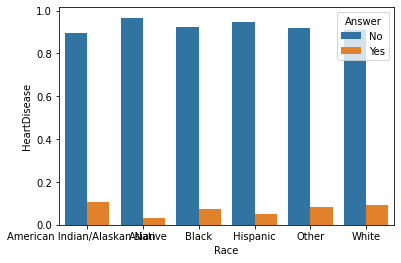

In [8]:
ax = sns.barplot(data=RaceDisease, x = "Race", y = "HeartDisease", hue= "Answer")

In [9]:
Age_Category =df2["AgeCategory"].unique()
Age_Category.sort()
Age_Category

array(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
      dtype=object)

In [10]:
count_race = df2.groupby("Race").count()[['Patient_ID']]
count_age = df2.groupby("AgeCategory").count()[['Patient_ID']]
count_sex = df2.groupby("Sex").count()[['Patient_ID']]

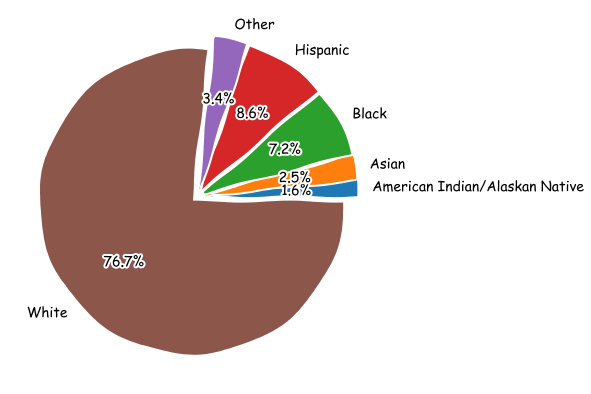

In [11]:
with plt.xkcd():
    plt.figure(figsize=(10,7))
    plt.pie(count_race["Patient_ID"],labels=count_race.index,explode=[.05 for _ in count_race.index], autopct="%1.1f%%")
    plt.show()

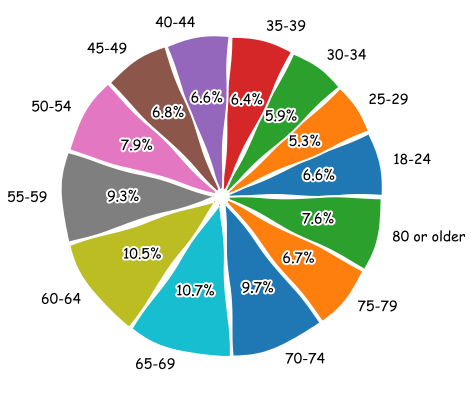

In [12]:
with plt.xkcd():
    plt.figure(figsize=(15,7))
    plt.pie(count_age["Patient_ID"],labels=count_age.index,explode=[.05 for _ in count_age.index], autopct="%1.1f%%")
    plt.show()

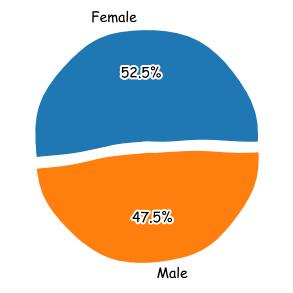

In [13]:
with plt.xkcd():
    plt.figure(figsize=(5,7))
    plt.pie(count_sex["Patient_ID"],labels=count_sex.index,explode=[.05 for _ in count_sex.index], autopct="%1.1f%%")
    plt.show()

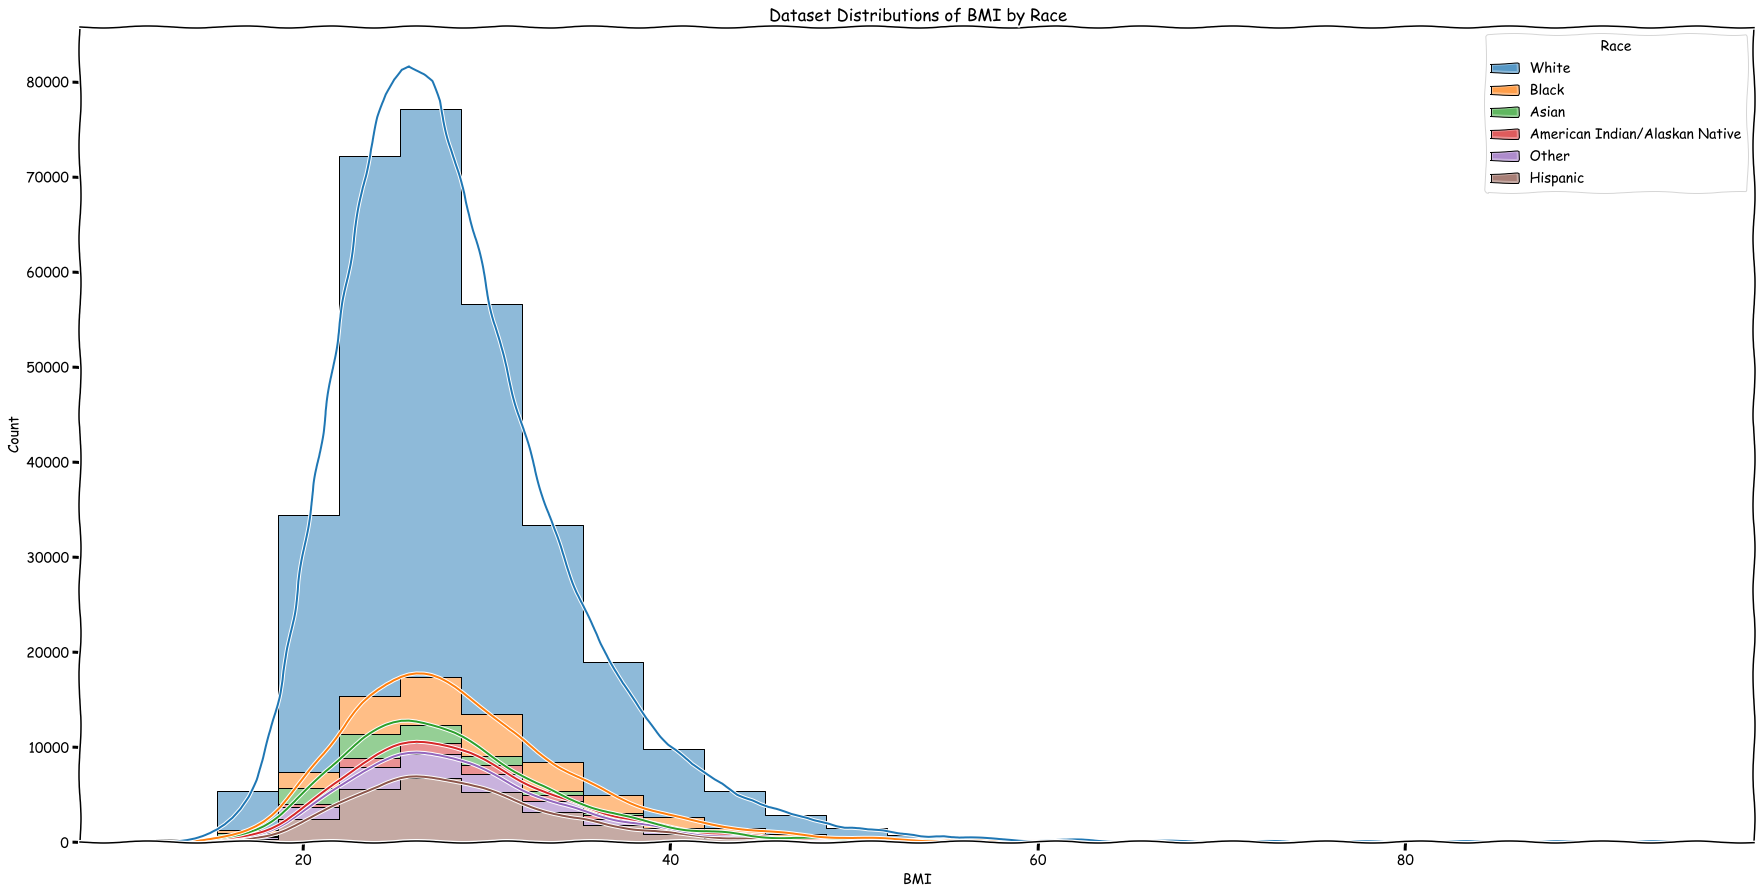

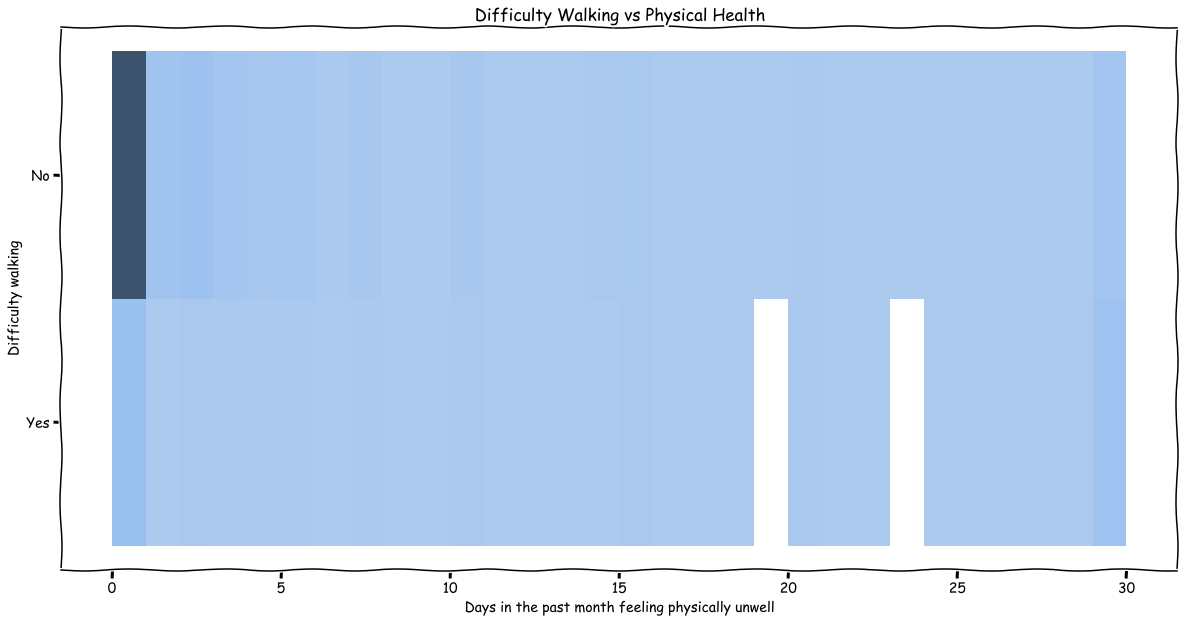

In [14]:
with plt.xkcd():
    plt.figure(figsize=(30, 15))
    sns.histplot(data=main_df, x="BMI", kde=True, hue="Race", multiple="stack", element="step", common_norm=True, bins=25)
    plt.title("Dataset Distributions of BMI by Race")
    plt.show()

with plt.xkcd():
    plt.figure(figsize=(20, 10))
    sns.histplot(data=main_df, x="PhysicalHealth", y="DiffWalking", bins=30, common_norm=True, pthresh=0.0001, stat="density")
    plt.title("Difficulty Walking vs Physical Health")
    plt.xlabel("Days in the past month feeling physically unwell")
    plt.ylabel("Difficulty walking")
    plt.show()

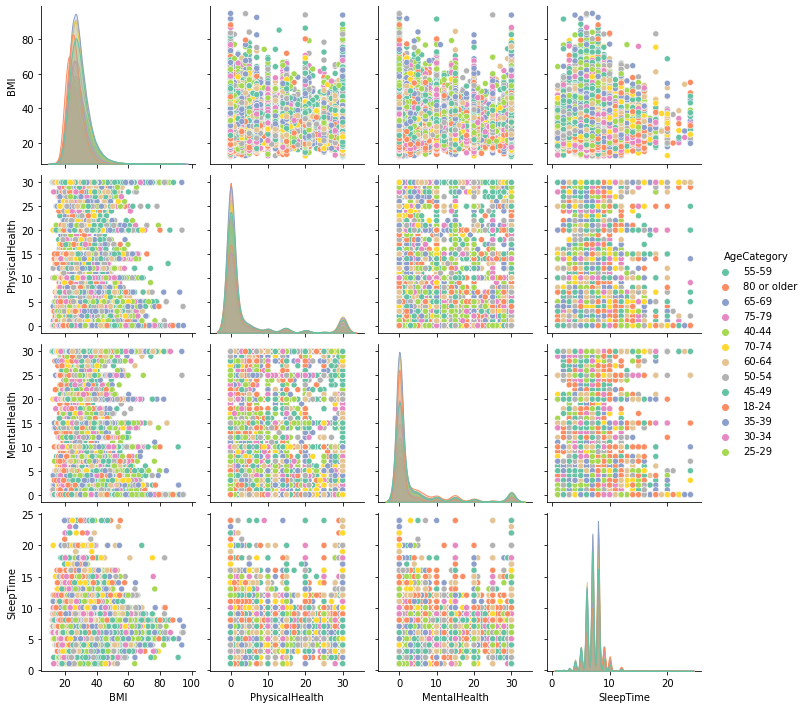

In [15]:
sns.pairplot(df, kind="scatter", hue="AgeCategory", palette="Set2")
plt.show()

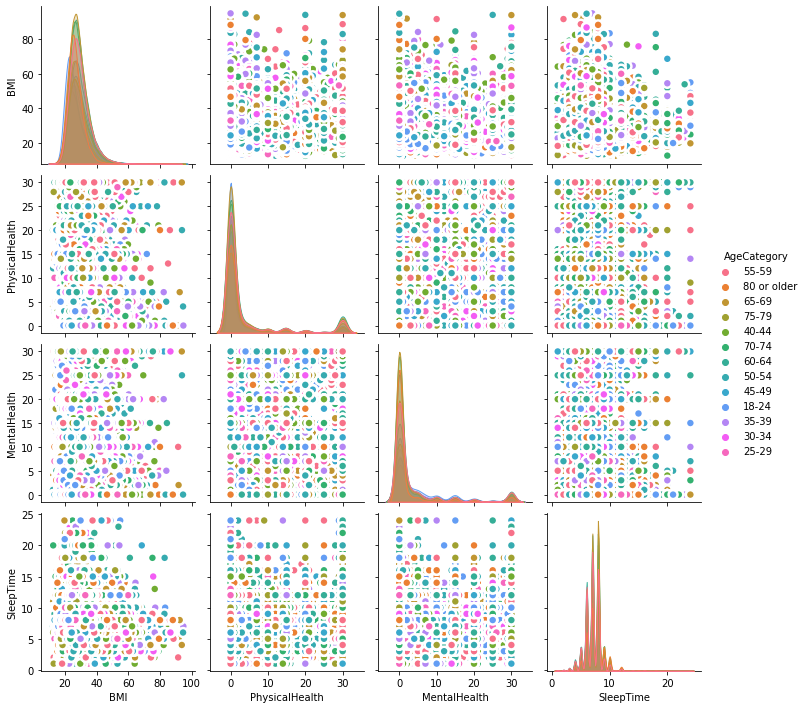

In [16]:
sns.pairplot(df, kind="scatter", hue="AgeCategory", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

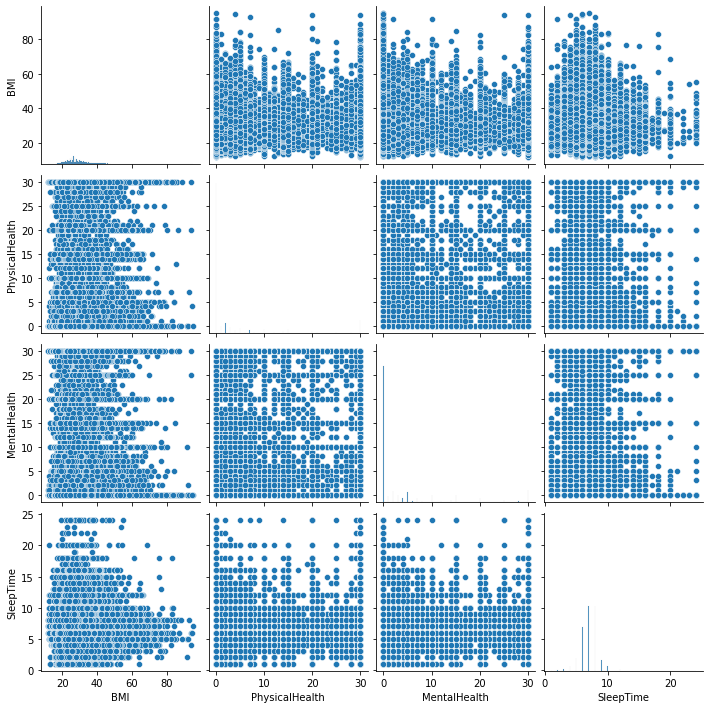

In [17]:
sns.pairplot(df)
plt.show()

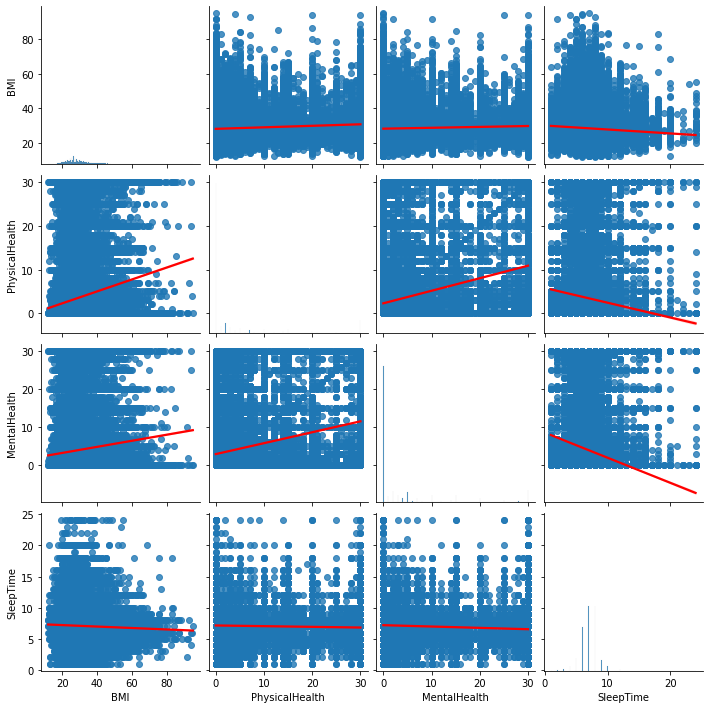

In [18]:
sns.pairplot(df, kind="reg", palette="Set2", plot_kws={'line_kws':{'color':'red'}})
plt.show()

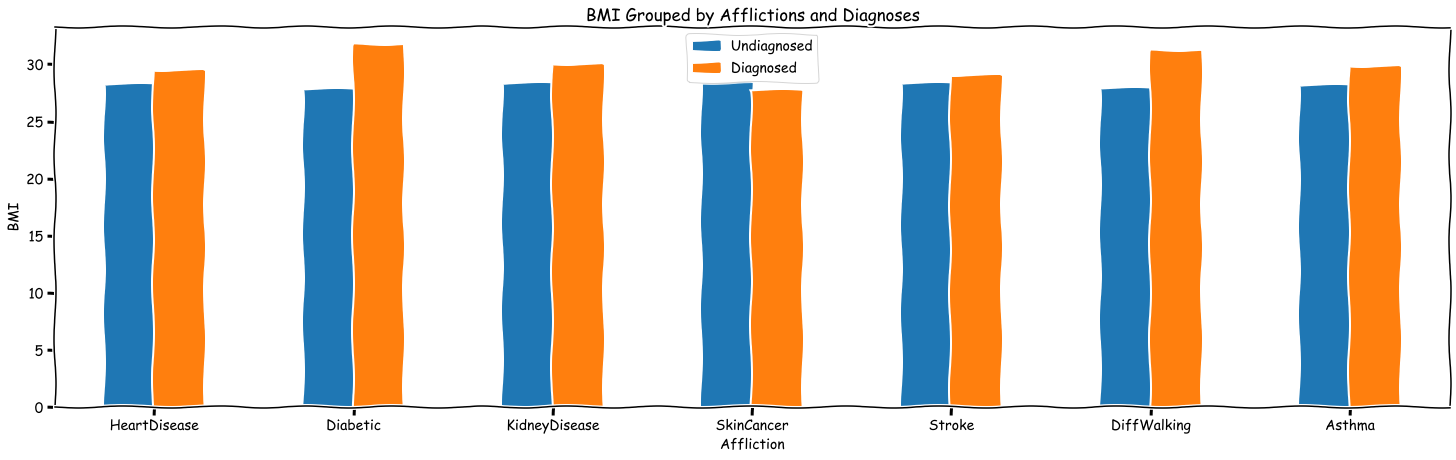

In [19]:
columns = ["BMI", "HeartDisease", "Diabetic", "KidneyDisease", "SkinCancer", "Stroke", "DiffWalking", "Asthma"]
heart = main_df[columns].groupby(["HeartDisease"]).BMI.mean()
diabetes = main_df[columns].groupby(["Diabetic"]).BMI.mean()
kidney = main_df[columns].groupby(["KidneyDisease"]).BMI.mean()
cancer = main_df[columns].groupby(["SkinCancer"]).BMI.mean()
stroke = main_df[columns].groupby(["Stroke"]).BMI.mean()
walking = main_df[columns].groupby(["DiffWalking"]).BMI.mean()
asthma = main_df[columns].groupby(["Asthma"]).BMI.mean()
no_bars = [heart.No, diabetes.No, kidney.No, cancer.No, stroke.No, walking.No, asthma.No]
yes_bars = [heart.Yes, diabetes.Yes, kidney.Yes, cancer.Yes, stroke.Yes, walking.Yes, asthma.Yes]
labels = tuple(columns[1:])
with plt.xkcd():
    df = pd.DataFrame({'Undiagnosed':no_bars,
                        'Diagnosed':yes_bars}, index=labels)
    df.plot.bar(figsize=(25, 7), rot=0)
    plt.title("BMI Grouped by Afflictions and Diagnoses")
    plt.xlabel("Affliction")
    plt.ylabel("BMI")
    plt.show()

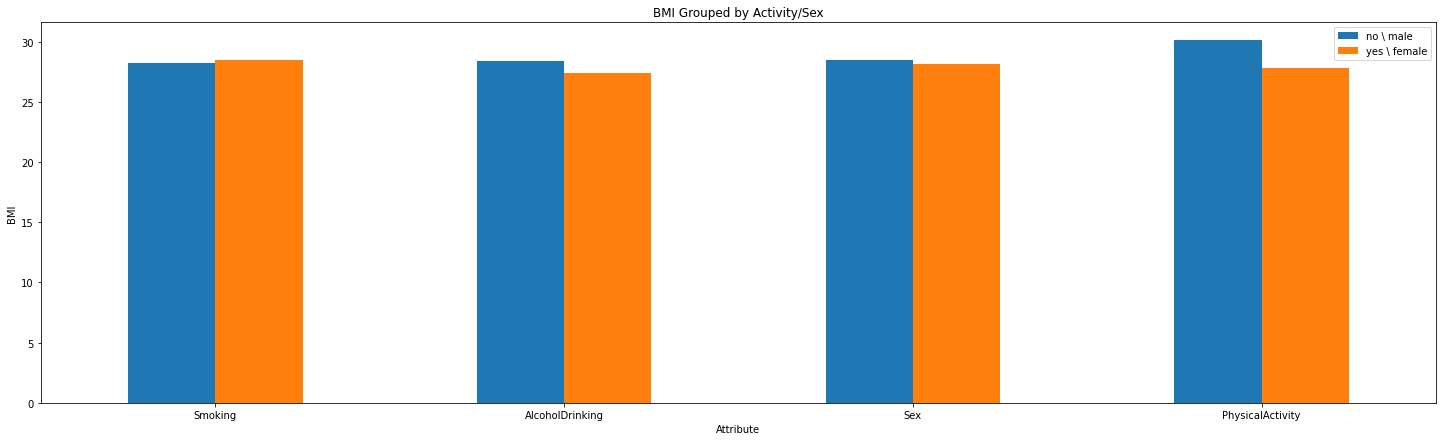

In [20]:
columns = ["BMI", "Smoking", "AlcoholDrinking", "Sex", "PhysicalActivity"]
smoke = main_df[columns].groupby(["Smoking"]).BMI.mean()
drank = main_df[columns].groupby(["AlcoholDrinking"]).BMI.mean()
sex = main_df[columns].groupby(["Sex"]).BMI.mean()
pa = main_df[columns].groupby(["PhysicalActivity"]).BMI.mean()
no_bars = [smoke.No, drank.No, sex.Male, pa.No]
yes_bars = [smoke.Yes, drank.Yes, sex.Female, pa.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'no \ male':no_bars,
                    'yes \ female':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.title("BMI Grouped by Activity/Sex")
plt.xlabel("Attribute")
plt.ylabel("BMI")
plt.show()

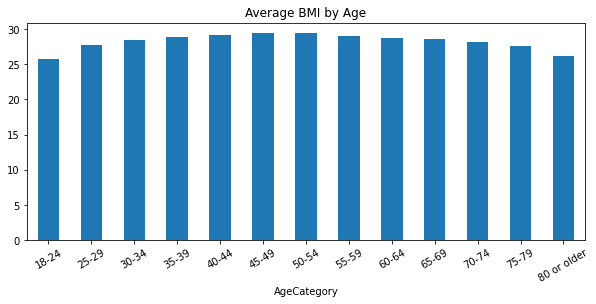

In [21]:
columns = ["BMI", "AgeCategory"]
age = main_df[columns].groupby(["AgeCategory"]).BMI.mean()
age.plot.bar(figsize=(10, 4), rot=30)
plt.title("Average BMI by Age")
plt.show()

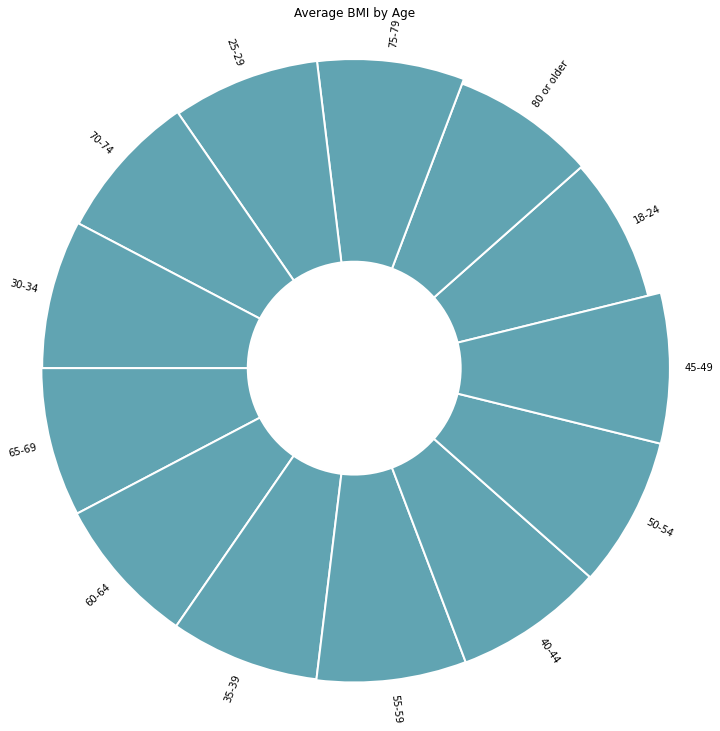

In [22]:
age = age.reset_index().sort_values(by=["BMI"])
age

plt.figure(figsize=(20, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 40
lowerLimit = 15

labelPadding = 2

max = age['BMI'].max()
slope = (max - lowerLimit) / max
heights = slope * age.BMI + lowerLimit 
width = 2*np.pi / len(age.index)
indexes = list(range(1, len(age.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color='#61a4b2'
)

for bar, angle, height, label in zip(bars, angles, heights, age["AgeCategory"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )

plt.title("Average BMI by Age")
plt.show()

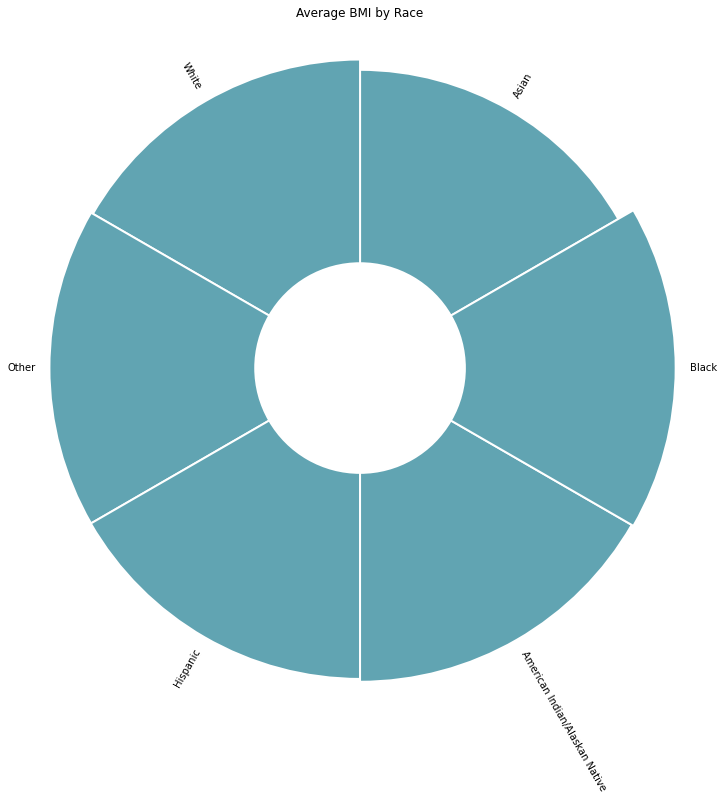

In [23]:
columns = ["BMI", "Race"]
race = main_df[columns].groupby(["Race"]).BMI.mean().reset_index().sort_values(by=["BMI"])

plt.figure(figsize=(20, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 40
lowerLimit = 15

labelPadding = 2

max = race['BMI'].max()
slope = (max - lowerLimit) / max
heights = slope * race.BMI + lowerLimit 
width = 2*np.pi / len(race.index)
indexes = list(range(1, len(race.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color='#61a4b2'
)

for bar, angle, height, label in zip(bars, angles, heights, race["Race"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )

plt.title("Average BMI by Race")
plt.show()

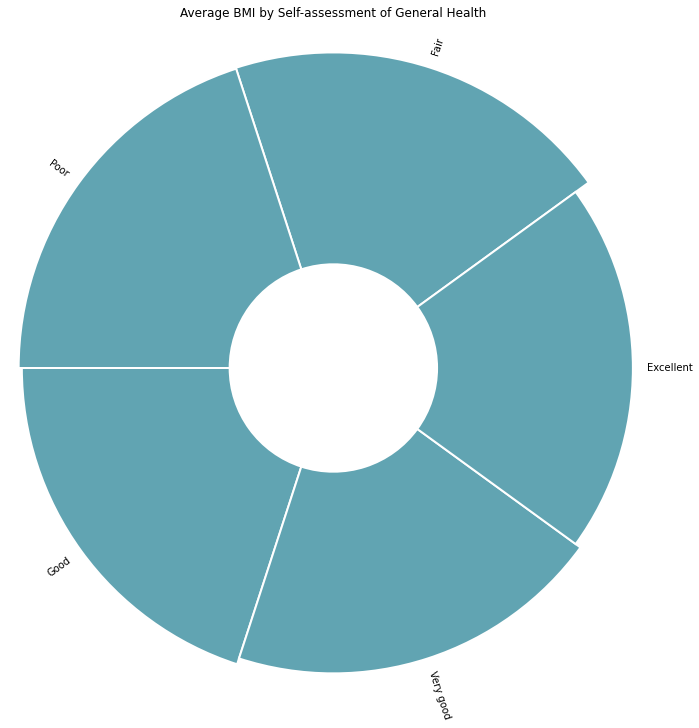

In [24]:
columns = ["BMI", "GenHealth"]
gen_health = main_df[columns].groupby(["GenHealth"]).BMI.mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(20, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 40
lowerLimit = 15

labelPadding = 2

max = gen_health['BMI'].max()
slope = (max - lowerLimit) / max
heights = slope * gen_health.BMI + lowerLimit 
width = 2*np.pi / len(gen_health.index)
indexes = list(range(1, len(gen_health.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color='#61a4b2'
)

for bar, angle, height, label in zip(bars, angles, heights, gen_health["GenHealth"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )

plt.title("Average BMI by Self-assessment of General Health")
plt.show()


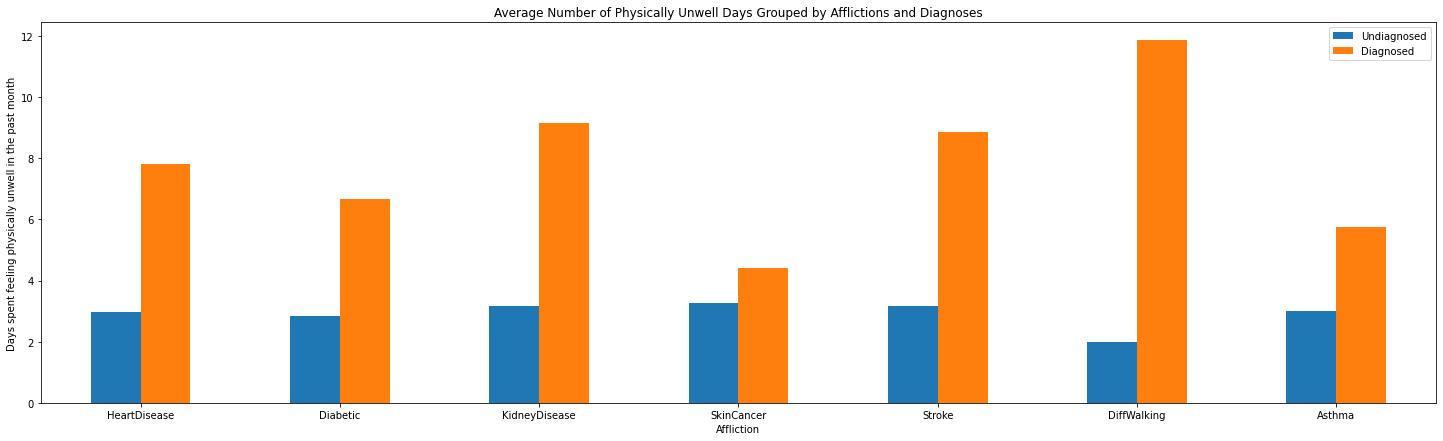

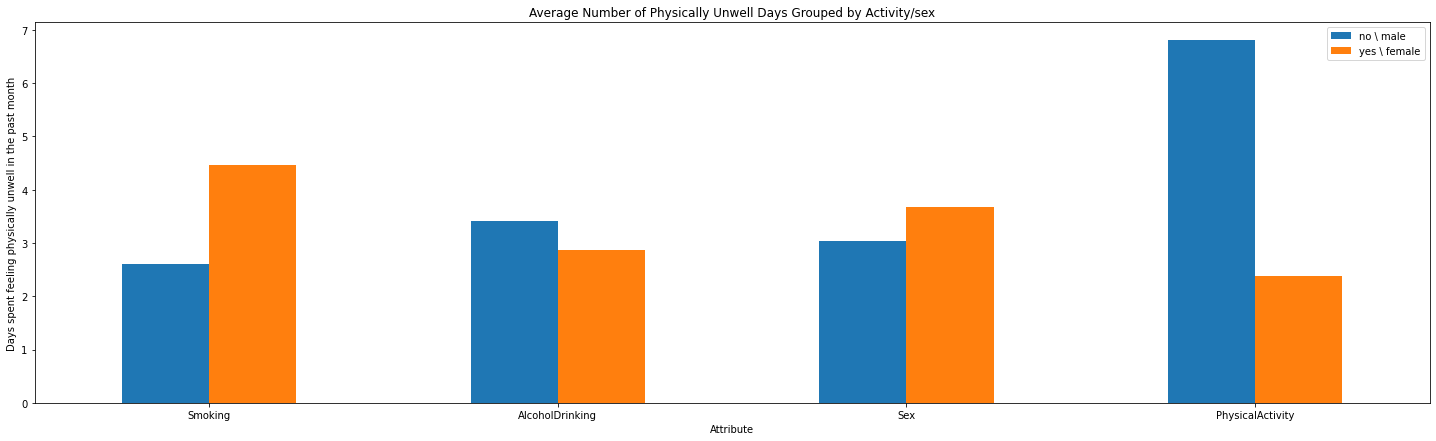

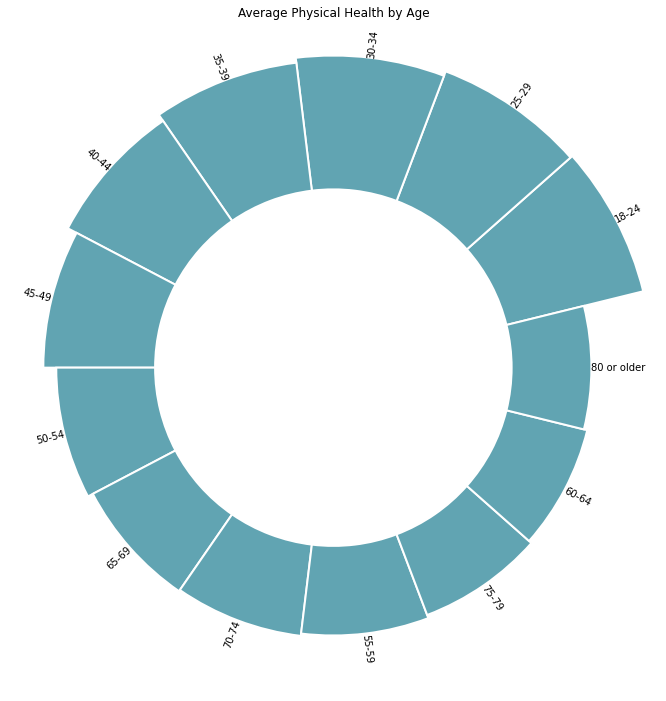

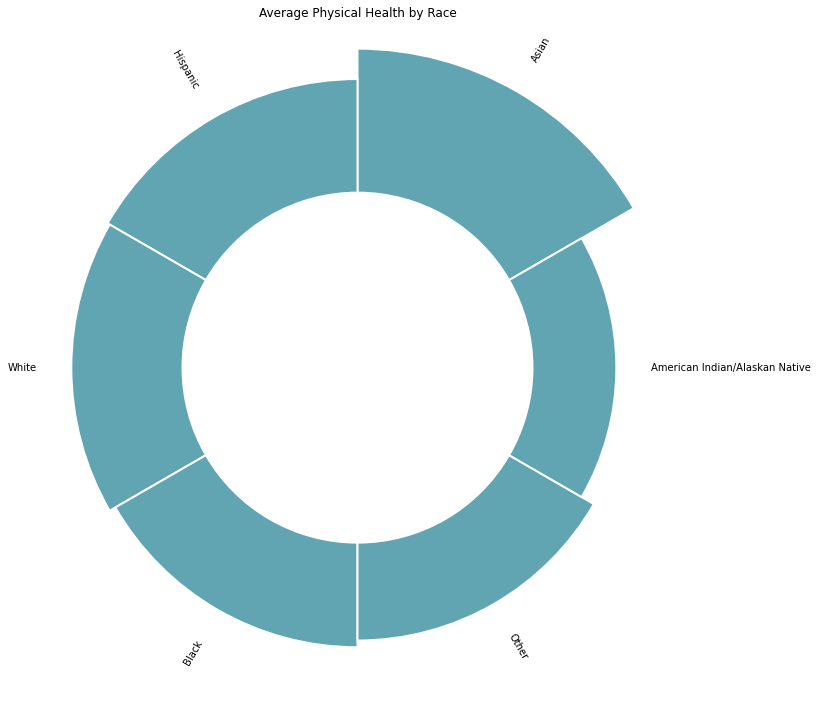

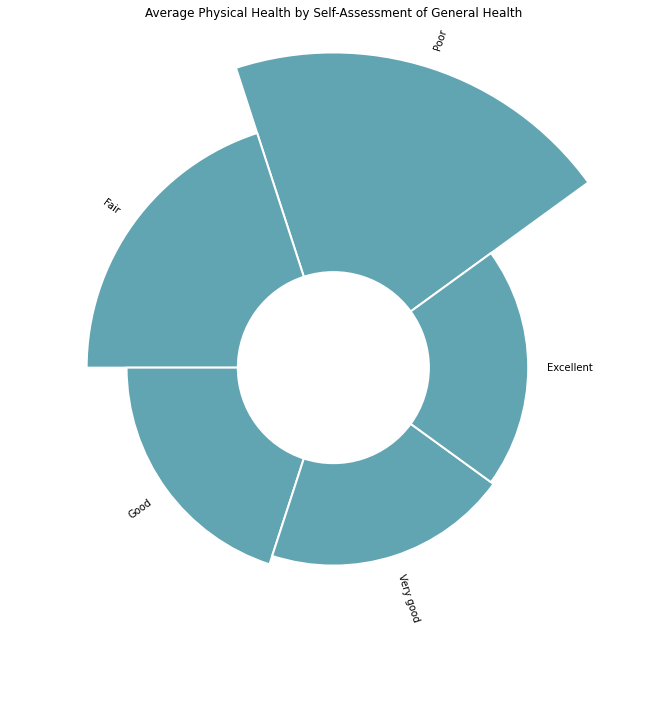

In [25]:
columns = ["PhysicalHealth", "HeartDisease", "Diabetic", "KidneyDisease", "SkinCancer", "Stroke", "DiffWalking", "Asthma"]
heart = main_df[columns].groupby(["HeartDisease"]).PhysicalHealth.mean()
diabetes = main_df[columns].groupby(["Diabetic"]).PhysicalHealth.mean()
kidney = main_df[columns].groupby(["KidneyDisease"]).PhysicalHealth.mean()
cancer = main_df[columns].groupby(["SkinCancer"]).PhysicalHealth.mean()
stroke = main_df[columns].groupby(["Stroke"]).PhysicalHealth.mean()
walking = main_df[columns].groupby(["DiffWalking"]).PhysicalHealth.mean()
asthma = main_df[columns].groupby(["Asthma"]).PhysicalHealth.mean()
no_bars = [heart.No, diabetes.No, kidney.No, cancer.No, stroke.No, walking.No, asthma.No]
yes_bars = [heart.Yes, diabetes.Yes, kidney.Yes, cancer.Yes, stroke.Yes, walking.Yes, asthma.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'Undiagnosed':no_bars,
                    'Diagnosed':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.title("Average Number of Physically Unwell Days Grouped by Afflictions and Diagnoses")
plt.xlabel("Affliction")
plt.ylabel("Days spent feeling physically unwell in the past month")
plt.show()

columns = ["PhysicalHealth", "Smoking", "AlcoholDrinking", "Sex", "PhysicalActivity"]
smoke = main_df[columns].groupby(["Smoking"]).PhysicalHealth.mean()
drank = main_df[columns].groupby(["AlcoholDrinking"]).PhysicalHealth.mean()
sex = main_df[columns].groupby(["Sex"]).PhysicalHealth.mean()
pa = main_df[columns].groupby(["PhysicalActivity"]).PhysicalHealth.mean()
no_bars = [smoke.No, drank.No, sex.Male, pa.No]
yes_bars = [smoke.Yes, drank.Yes, sex.Female, pa.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'no \ male':no_bars,
                    'yes \ female':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.title("Average Number of Physically Unwell Days Grouped by Activity/sex")
plt.xlabel("Attribute")
plt.ylabel("Days spent feeling physically unwell in the past month")
plt.show()

columns = ["PhysicalHealth", "AgeCategory"]
age = main_df[columns].groupby(["AgeCategory"]).PhysicalHealth.mean().reset_index().sort_values(by=["PhysicalHealth"])
plt.figure(figsize=(20, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 30
lowerLimit = 10

labelPadding = 0

max = age['PhysicalHealth'].max()
slope = (max - lowerLimit) / max
heights = slope * age.PhysicalHealth + lowerLimit 
width = 2*np.pi / len(age.index)
indexes = list(range(1, len(age.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color='#61a4b2'
)

for bar, angle, height, label in zip(bars, angles, heights, age["AgeCategory"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )

plt.title("Average Physical Health by Age")
plt.show()

columns = ["PhysicalHealth", "Race"]
race = main_df[columns].groupby(["Race"]).PhysicalHealth.mean().reset_index().sort_values(by=["PhysicalHealth"])
plt.figure(figsize=(20, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 30
lowerLimit = 10

labelPadding = 2

max = race['PhysicalHealth'].max()
slope = (max - lowerLimit) / max
heights = slope * race.PhysicalHealth + lowerLimit 
width = 2*np.pi / len(race.index)
indexes = list(range(1, len(race.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color='#61a4b2'
)

for bar, angle, height, label in zip(bars, angles, heights, race["Race"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )

plt.title("Average Physical Health by Race")
plt.show()

columns = ["PhysicalHealth", "GenHealth"]
gen_health = main_df[columns].groupby(["GenHealth"]).PhysicalHealth.mean().sort_values(ascending=False).reset_index()


plt.figure(figsize=(20, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 30
lowerLimit = 10

labelPadding = 2

max = gen_health['PhysicalHealth'].max()
slope = (max - lowerLimit) / max
heights = slope * gen_health.PhysicalHealth + lowerLimit 
width = 2*np.pi / len(gen_health.index)
indexes = list(range(1, len(gen_health.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color='#61a4b2'
)

for bar, angle, height, label in zip(bars, angles, heights, gen_health["GenHealth"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )

plt.title("Average Physical Health by Self-Assessment of General Health")
plt.show()

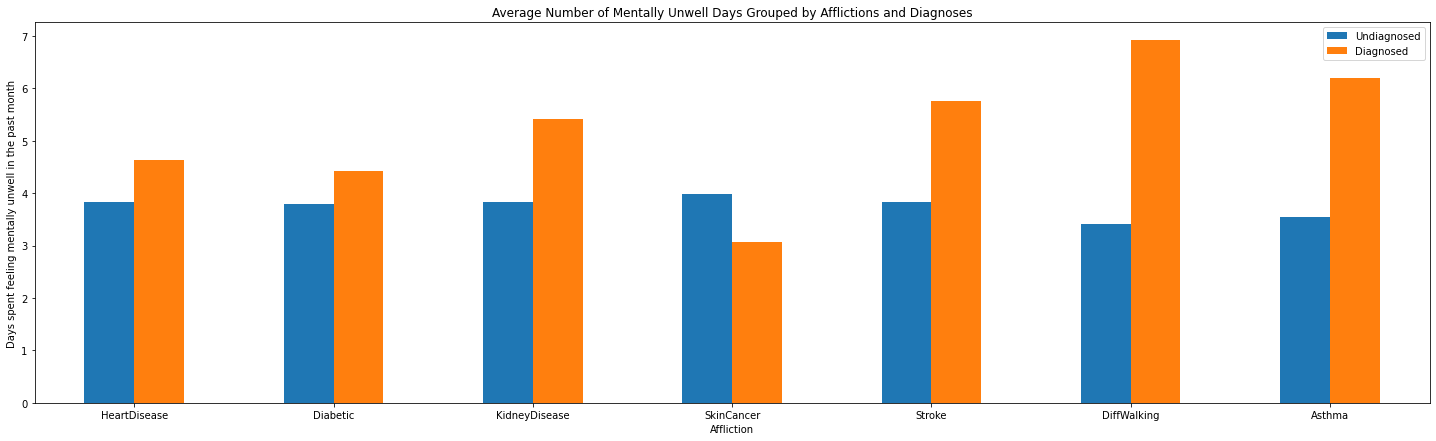

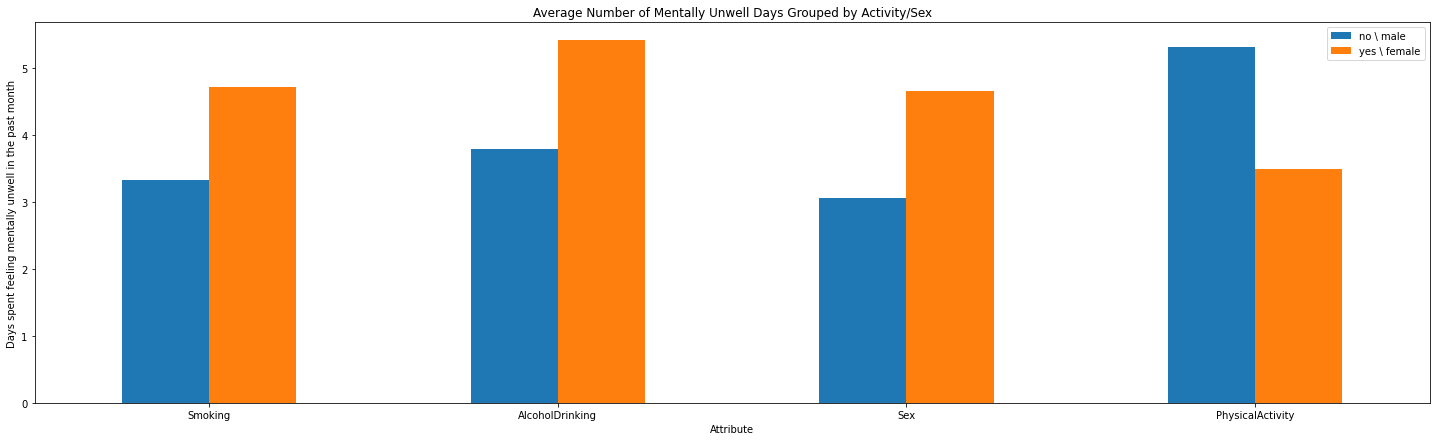

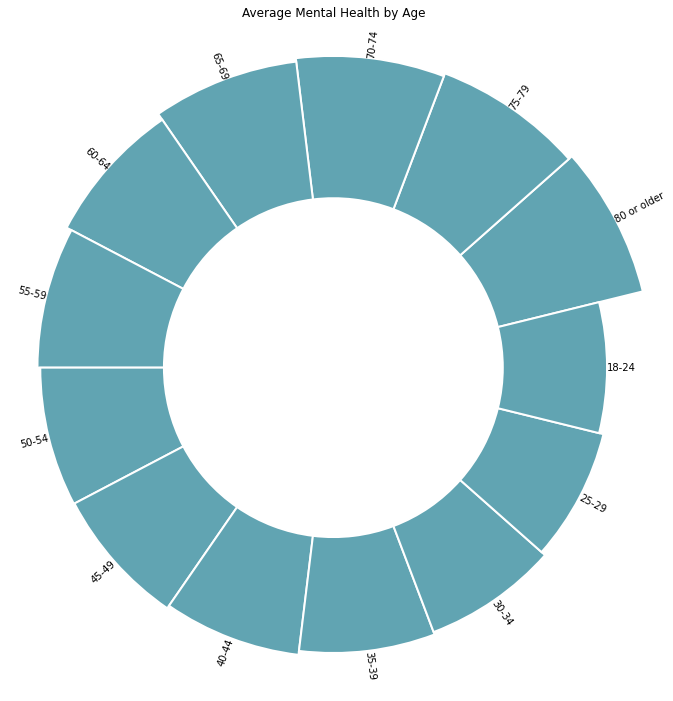

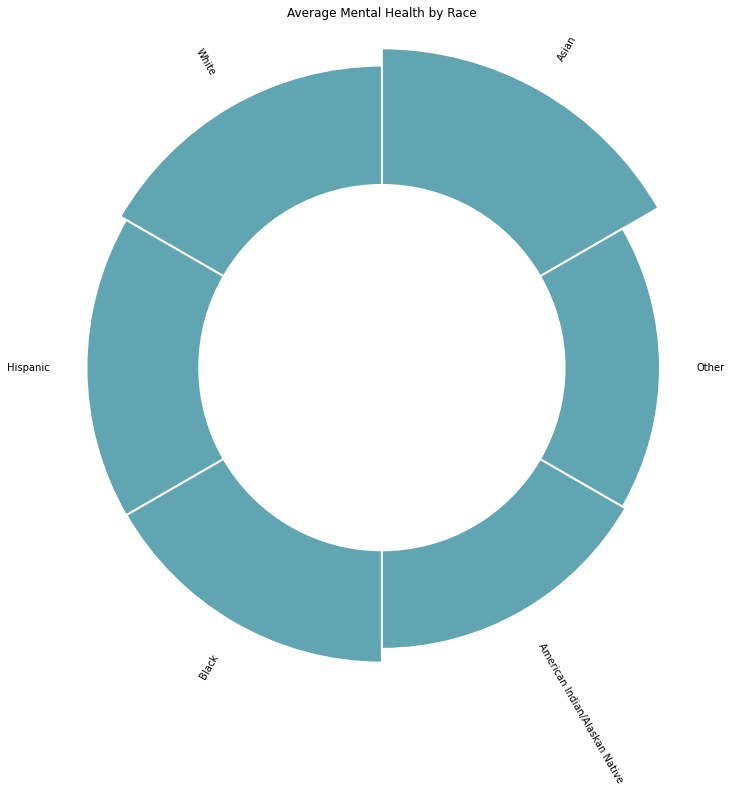

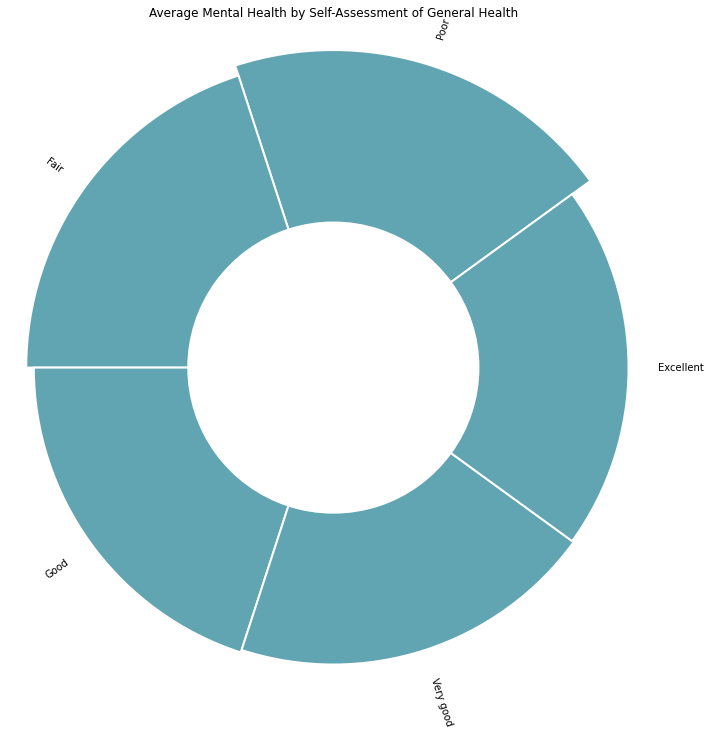

In [26]:
columns = ["MentalHealth", "HeartDisease", "Diabetic", "KidneyDisease", "SkinCancer", "Stroke", "DiffWalking", "Asthma"]
heart = main_df[columns].groupby(["HeartDisease"]).MentalHealth.mean()
diabetes = main_df[columns].groupby(["Diabetic"]).MentalHealth.mean()
kidney = main_df[columns].groupby(["KidneyDisease"]).MentalHealth.mean()
cancer = main_df[columns].groupby(["SkinCancer"]).MentalHealth.mean()
stroke = main_df[columns].groupby(["Stroke"]).MentalHealth.mean()
walking = main_df[columns].groupby(["DiffWalking"]).MentalHealth.mean()
asthma = main_df[columns].groupby(["Asthma"]).MentalHealth.mean()
no_bars = [heart.No, diabetes.No, kidney.No, cancer.No, stroke.No, walking.No, asthma.No]
yes_bars = [heart.Yes, diabetes.Yes, kidney.Yes, cancer.Yes, stroke.Yes, walking.Yes, asthma.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'Undiagnosed':no_bars,
                    'Diagnosed':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.title("Average Number of Mentally Unwell Days Grouped by Afflictions and Diagnoses")
plt.xlabel("Affliction")
plt.ylabel("Days spent feeling mentally unwell in the past month")
plt.show()

columns = ["MentalHealth", "Smoking", "AlcoholDrinking", "Sex", "PhysicalActivity"]
smoke = main_df[columns].groupby(["Smoking"]).MentalHealth.mean()
drank = main_df[columns].groupby(["AlcoholDrinking"]).MentalHealth.mean()
sex = main_df[columns].groupby(["Sex"]).MentalHealth.mean()
pa = main_df[columns].groupby(["PhysicalActivity"]).MentalHealth.mean()
no_bars = [smoke.No, drank.No, sex.Male, pa.No]
yes_bars = [smoke.Yes, drank.Yes, sex.Female, pa.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'no \ male':no_bars,
                    'yes \ female':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.title("Average Number of Mentally Unwell Days Grouped by Activity/Sex")
plt.xlabel("Attribute")
plt.ylabel("Days spent feeling mentally unwell in the past month")
plt.show()

columns = ["MentalHealth", "AgeCategory"]
age = main_df[columns].groupby(["AgeCategory"]).MentalHealth.mean().reset_index().sort_values(by=["MentalHealth"])
plt.figure(figsize=(20, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 30
lowerLimit = 10

labelPadding = 0

max = age['MentalHealth'].max()
slope = (max - lowerLimit) / max
heights = slope * age.MentalHealth + lowerLimit 
width = 2*np.pi / len(age.index)
indexes = list(range(1, len(age.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color='#61a4b2'
)

for bar, angle, height, label in zip(bars, angles, heights, age["AgeCategory"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )

plt.title("Average Mental Health by Age")
plt.show()

columns = ["MentalHealth", "Race"]
race = main_df[columns].groupby(["Race"]).MentalHealth.mean().reset_index().sort_values(by=["MentalHealth"])
plt.figure(figsize=(20, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 30
lowerLimit = 10

labelPadding = 2

max = race['MentalHealth'].max()
slope = (max - lowerLimit) / max
heights = slope * race.MentalHealth + lowerLimit 
width = 2*np.pi / len(race.index)
indexes = list(range(1, len(race.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color='#61a4b2'
)

for bar, angle, height, label in zip(bars, angles, heights, race["Race"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )

plt.title("Average Mental Health by Race")
plt.show()

columns = ["MentalHealth", "GenHealth"]
gen_health = main_df[columns].groupby(["GenHealth"]).MentalHealth.mean().sort_values(ascending=False).reset_index()


plt.figure(figsize=(20, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 30
lowerLimit = 10

labelPadding = 2

max = gen_health['MentalHealth'].max()
slope = (max - lowerLimit) / max
heights = slope * gen_health.MentalHealth + lowerLimit 
width = 2*np.pi / len(gen_health.index)
indexes = list(range(1, len(gen_health.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color='#61a4b2'
)

for bar, angle, height, label in zip(bars, angles, heights, gen_health["GenHealth"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )

plt.title("Average Mental Health by Self-Assessment of General Health")
plt.show()

In [30]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [33]:

df.corr()

BMI  PhysicalHealth  MentalHealth  SleepTime
BMI             1.000000        0.109788      0.064131  -0.051822
PhysicalHealth  0.109788        1.000000      0.287987  -0.061387
MentalHealth    0.064131        0.287987      1.000000  -0.119717
SleepTime      -0.051822       -0.061387     -0.119717   1.000000

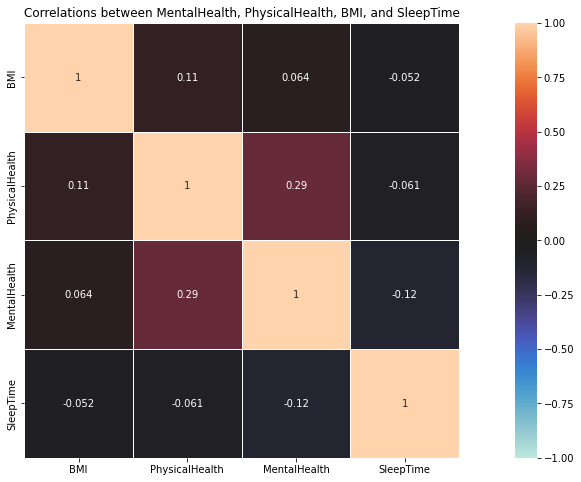

In [34]:
plt.figure(figsize=(20,8))
heat_map = sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0,
			linewidth=.5,square=True, annot = True)
plt.title('Correlations between MentalHealth, PhysicalHealth, BMI, and SleepTime')
plt.show()

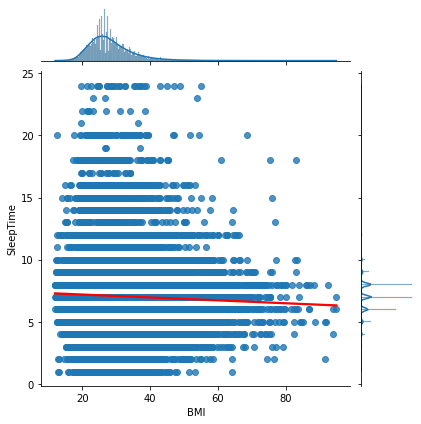

In [35]:
plot = sns.jointplot(x=df['BMI'], y=df['SleepTime'], data=df, kind='reg')
regline = plot.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)
plt.show()

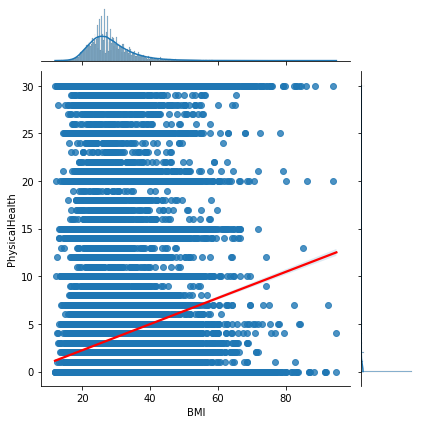

In [36]:
plot = sns.jointplot(x=df['BMI'], y=df['PhysicalHealth'], data=df, kind='reg')
regline = plot.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)
plt.show()
plt.show()

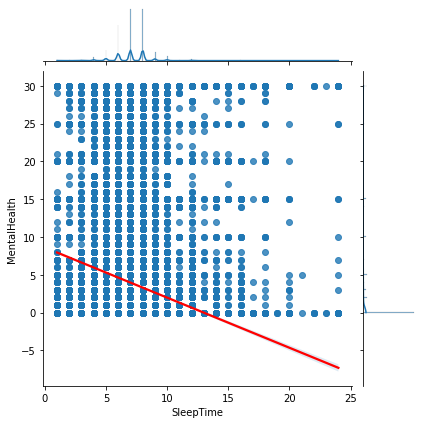

In [37]:
plot = sns.jointplot(x=df['SleepTime'], y=df['MentalHealth'], data=df, kind='reg')
regline = plot.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)
plt.show()
plt.show()

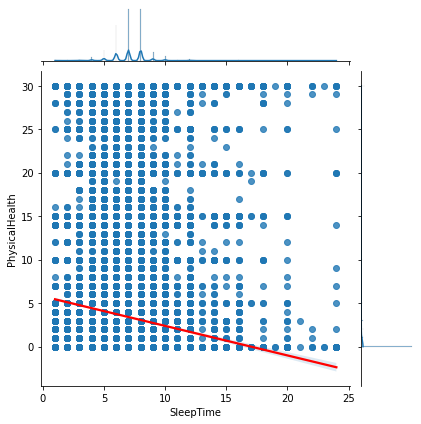

In [38]:
plot = sns.jointplot(x=df['SleepTime'], y=df['PhysicalHealth'], data=df, kind='reg')
regline = plot.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)
plt.show()
plt.show()

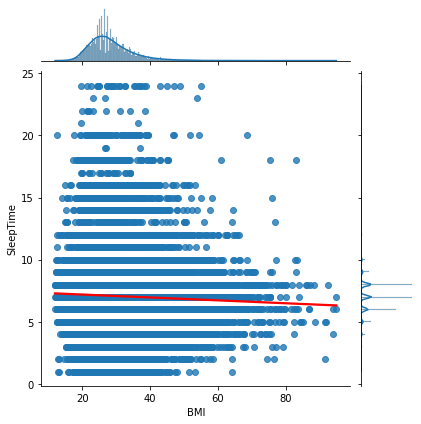

In [39]:
plot = sns.jointplot(x=df['BMI'], y=df['SleepTime'], data=df, kind='reg')
regline = plot.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)
plt.show()

In [40]:
sns.set(style="darkgrid")

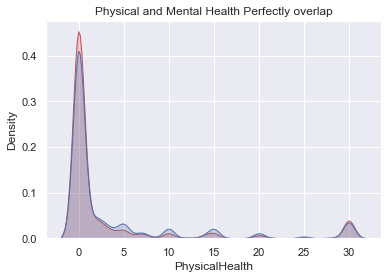

In [41]:
fig = sns.kdeplot(df['PhysicalHealth'], shade=True, color="r")
fig = sns.kdeplot(df['MentalHealth'], shade=True, color="b")
plt.title('Physical and Mental Health Perfectly overlap')
plt.show()

c:\Users\ducey\Desktop\JUMP\Week 5\week_5_env\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


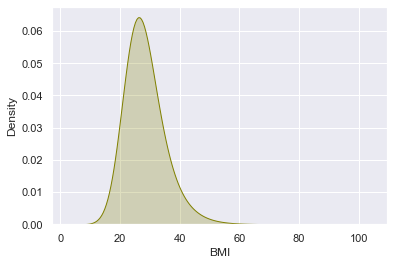

In [42]:
sns.kdeplot(df['BMI'], shade=True, bw=0.5, color="olive")
plt.show()

c:\Users\ducey\Desktop\JUMP\Week 5\week_5_env\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


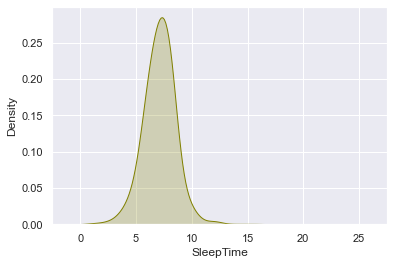

In [43]:
sns.kdeplot(df['SleepTime'], shade=True, bw=0.5, color="olive")
plt.show()

c:\Users\ducey\Desktop\JUMP\Week 5\week_5_env\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


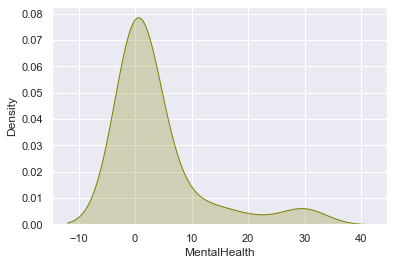

In [44]:
sns.kdeplot(df['MentalHealth'], shade=True, bw=0.5, color="olive")
plt.show()

c:\Users\ducey\Desktop\JUMP\Week 5\week_5_env\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


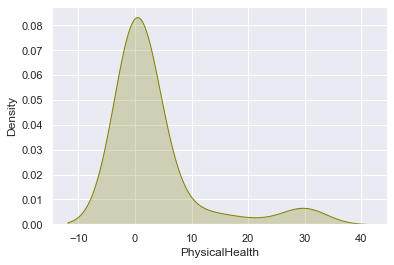

In [45]:
sns.kdeplot(df['PhysicalHealth'], shade=True, bw=0.5, color="olive")
plt.show()

In [46]:
ageheartcount=df2['HeartDisease'].groupby(df2["AgeCategory"]).value_counts()
agesmokecount = df2['Smoking'].groupby(df2["AgeCategory"]).value_counts()
agealccount = df2['AlcoholDrinking'].groupby(df2["AgeCategory"]).value_counts()
agestrokecount= df2['Stroke'].groupby(df2["AgeCategory"]).value_counts()
agediabeticcount = df2['Diabetic'].groupby(df2["AgeCategory"]).value_counts()
ageasthmacount = df2['Asthma'].groupby(df2["AgeCategory"]).value_counts()
agekidneyacount = df2['KidneyDisease'].groupby(df2["AgeCategory"]).value_counts()
ageskincount = df2['SkinCancer'].groupby(df2["AgeCategory"]).value_counts()
agediffwalkingcount = df2['DiffWalking'].groupby(df2["AgeCategory"]).value_counts()
ageactivitycount = df2['PhysicalActivity'].groupby(df2["AgeCategory"]).value_counts()

In [47]:
AgeDiseases = pd.concat([ageheartcount,agesmokecount, agealccount , agestrokecount,agediffwalkingcount, agediabeticcount,ageactivitycount,  ageasthmacount, agekidneyacount, ageskincount ], axis=1)
AgeDiseases = AgeDiseases.dropna().reset_index()
AgeDiseases = AgeDiseases.rename(columns = {"level_1": "Answer" } )
AgeDiseases = AgeDiseases.where(AgeDiseases["Answer"] == "Yes").dropna()
AgeDiseases= AgeDiseases.set_index("AgeCategory")
AgeDiseases

Answer  HeartDisease  Smoking  AlcoholDrinking  Stroke  \
AgeCategory                                                          
18-24          Yes         130.0   3284.0           1521.0    61.0   
25-29          Yes         133.0   5154.0           1571.0    90.0   
30-34          Yes         226.0   7172.0           1578.0   131.0   
35-39          Yes         296.0   8642.0           1825.0   193.0   
40-44          Yes         486.0   9081.0           1806.0   293.0   
45-49          Yes         744.0   8725.0           1684.0   428.0   
50-54          Yes        1383.0   9973.0           1959.0   685.0   
55-59          Yes        2202.0  12672.0           2218.0  1101.0   
60-64          Yes        3327.0  15436.0           2334.0  1483.0   
65-69          Yes        4101.0  15563.0           2101.0  1705.0   
70-74          Yes        4847.0  14925.0           1597.0  1891.0   
75-79          Yes        4049.0  10754.0            901.0  1710.0   
80 or older    Yes        5449.0  10527.0            682.0  2298.0   

             DiffWalking  Diabetic  PhysicalActivity  Asthma  KidneyDisease  \
AgeCategory                                                                   
18-24              327.0     233.0           18062.0  3727.0          132.0   
25-29              364.0     251.0           14338.0  2868.0          115.0   
30-34              587.0     474.0           15758.0  2845.0          164.0   
35-39              969.0     831.0           16960.0  2879.0          256.0   
40-44             1321.0    1303.0           17066.0  3065.0          366.0   
45-49             1906.0    2019.0           17289.0  3135.0          451.0   
50-54             3108.0    3072.0           19744.0  3472.0          700.0   
55-59             4650.0    4417.0           22972.0  3943.0          998.0   
60-64             5972.0    5672.0           25575.0  4498.0         1372.0   
65-69             6021.0    6550.0           26108.0  4120.0         1689.0   
70-74             6187.0    6761.0           23252.0  3671.0         1970.0   
75-79             5058.0    4791.0           15369.0  2404.0         1599.0   
80 or older       7940.0    4428.0           15464.0  2245.0         1967.0   

             SkinCancer  
AgeCategory              
18-24              67.0  
25-29              83.0  
30-34             159.0  
35-39             263.0  
40-44             414.0  
45-49             773.0  
50-54            1289.0  
55-59            2188.0  
60-64            3338.0  
65-69            4608.0  
70-74            5565.0  
75-79            4837.0  
80 or older      6235.0

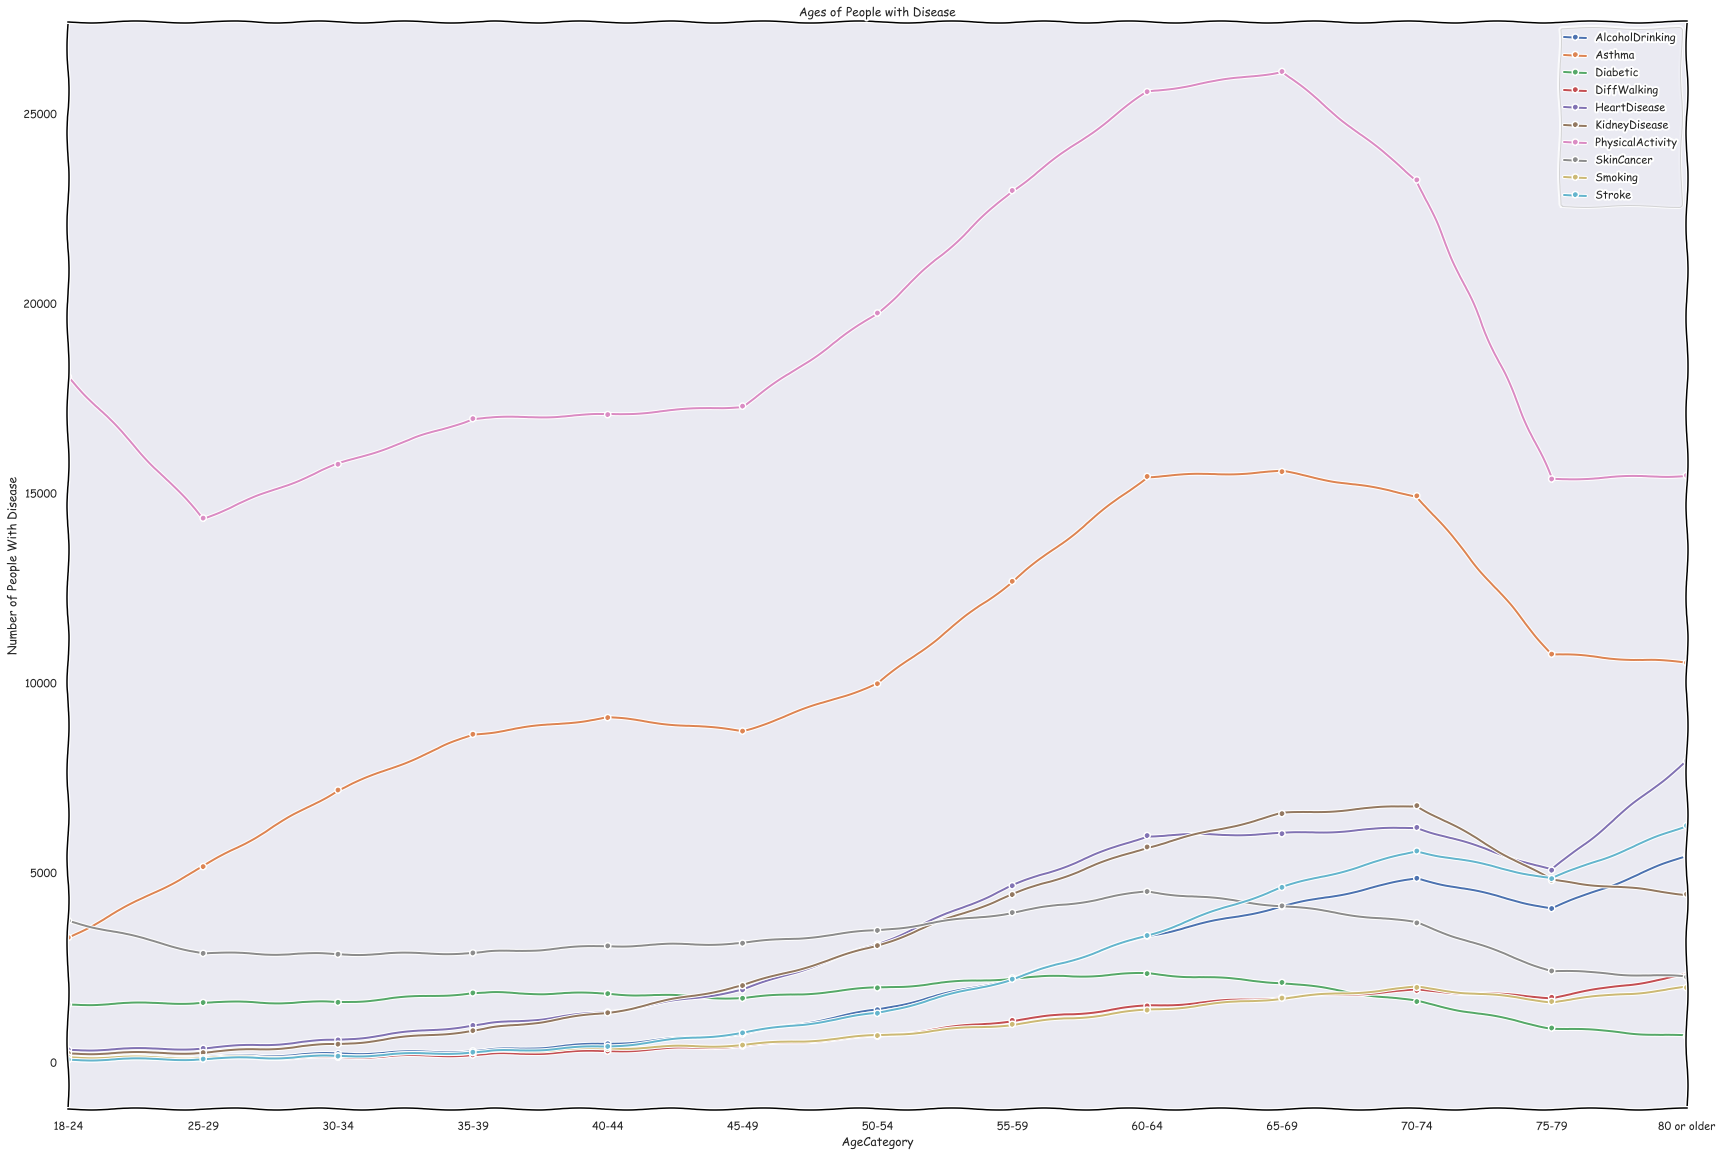

In [48]:
with plt.xkcd():
    plt.figure(figsize=(29,20))
    plt.xlabel('AgeCategory')
    plt.xlim(0,12)
    plt.ylabel('Number of People With Disease') 
    plt.title('Ages of People with Disease')
    for col in AgeDiseases[["HeartDisease", "Smoking","AlcoholDrinking","Stroke","DiffWalking","Diabetic","PhysicalActivity","Asthma","KidneyDisease","SkinCancer"]]:

        plt.plot(AgeDiseases.index, AgeDiseases[col], marker = ".")
        plt.legend(AgeDiseases.columns.difference(['Answer']))

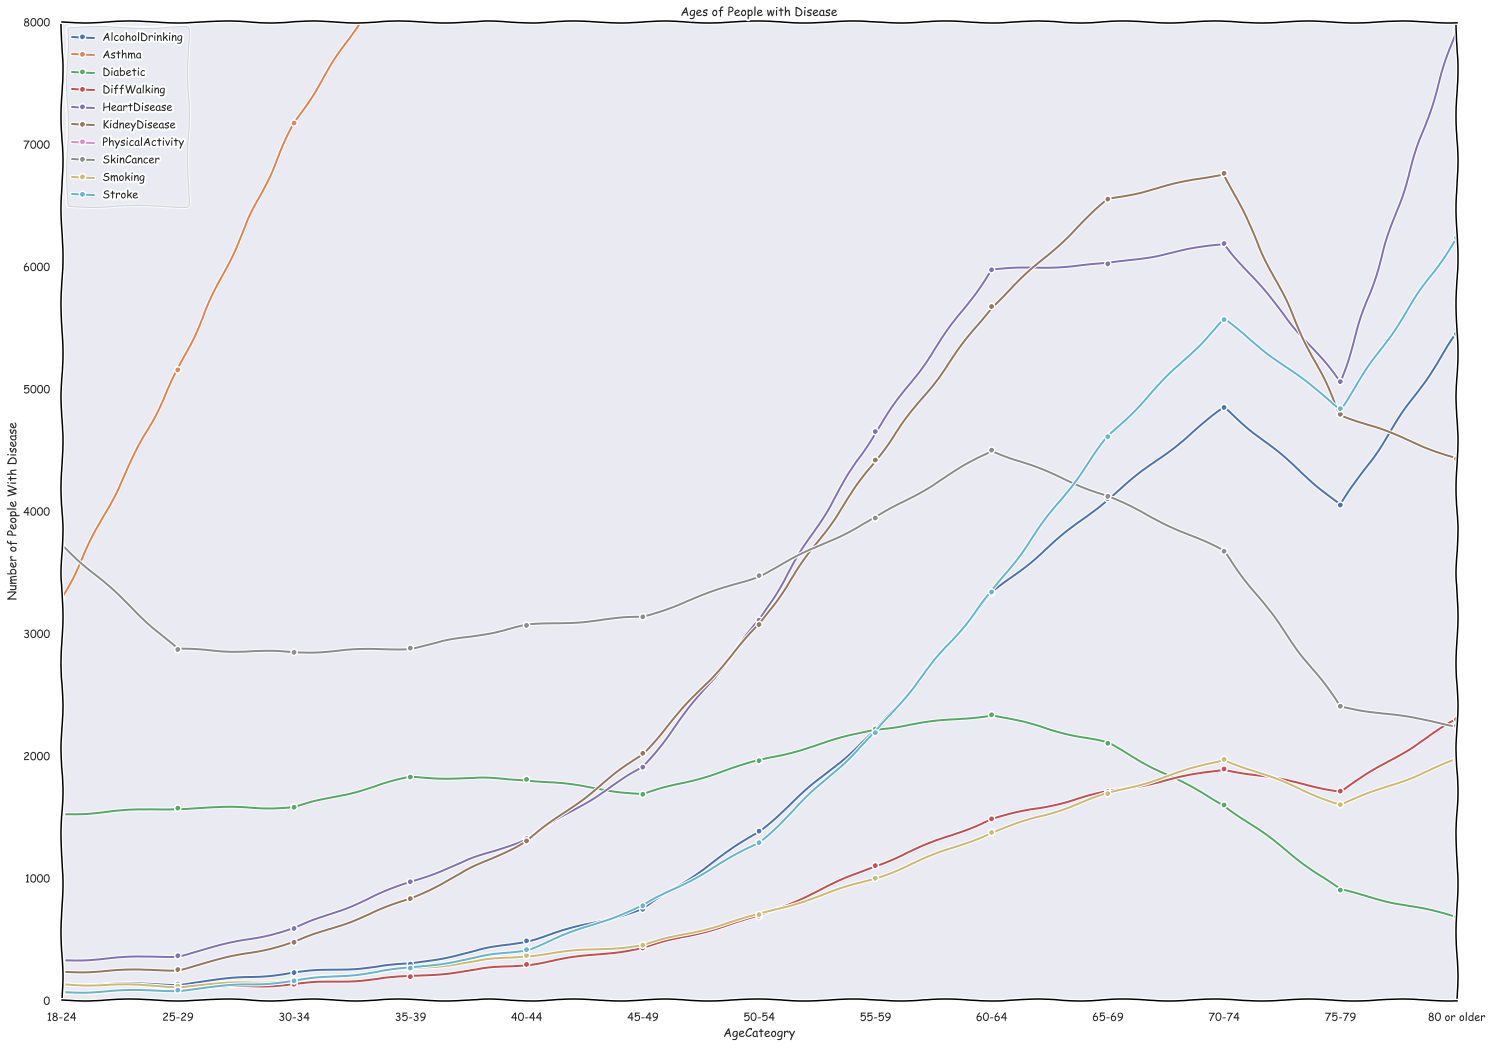

In [49]:
with plt.xkcd():
    plt.figure(figsize=(25,18))
    plt.axis([0, 12, 0, 8000])
    plt.xlabel('AgeCateogry')
    plt.ylabel('Number of People With Disease') 
    plt.title('Ages of People with Disease')
    for col in AgeDiseases[["HeartDisease", "Smoking","AlcoholDrinking","Stroke","DiffWalking","Diabetic","PhysicalActivity","Asthma","KidneyDisease","SkinCancer"]]:

        plt.plot(AgeDiseases.index, AgeDiseases[col], marker = ".")
        plt.legend(AgeDiseases.columns.difference(['Answer']))

In [50]:
ageheartcountpercent=df2['HeartDisease'].groupby(df2["AgeCategory"]).value_counts(normalize=True)
agesmokecountpercent = df2['Smoking'].groupby(df2["AgeCategory"]).value_counts(normalize=True)
agealccountpercent = df2['AlcoholDrinking'].groupby(df2["AgeCategory"]).value_counts(normalize=True)
agestrokecountpercent= df2['Stroke'].groupby(df2["AgeCategory"]).value_counts(normalize=True)
agediabeticcountpercent = df2['Diabetic'].groupby(df2["AgeCategory"]).value_counts(normalize=True)
ageasthmacountpercent = df2['Asthma'].groupby(df2["AgeCategory"]).value_counts(normalize=True)
agekidneyacountpercent = df2['KidneyDisease'].groupby(df2["AgeCategory"]).value_counts(normalize=True)
ageskincountpercent = df2['SkinCancer'].groupby(df2["AgeCategory"]).value_counts(normalize=True)
agediffwalkingcountpercent = df2['DiffWalking'].groupby(df2["AgeCategory"]).value_counts(normalize=True)
ageactivitycountpercent = df2['PhysicalActivity'].groupby(df2["AgeCategory"]).value_counts(normalize=True)

In [51]:
AgeDiseasespercent = pd.concat([ageheartcountpercent,agesmokecountpercent, agealccountpercent , agestrokecountpercent,agediffwalkingcountpercent, agediabeticcountpercent,ageactivitycountpercent,  ageasthmacountpercent, agekidneyacountpercent, ageskincountpercent ], axis=1)
AgeDiseasespercent = AgeDiseasespercent.dropna().reset_index()
AgeDiseasespercent = AgeDiseasespercent.rename(columns = {"level_1": "Answer" } )
AgeDiseasespercent = AgeDiseasespercent.where(AgeDiseasespercent["Answer"] == "Yes").dropna()
AgeDiseasespercent= AgeDiseasespercent.set_index("AgeCategory")
AgeDiseasespercent

Answer  HeartDisease   Smoking  AlcoholDrinking    Stroke  \
AgeCategory                                                             
18-24          Yes      0.006172  0.155906         0.072209  0.002896   
25-29          Yes      0.007844  0.303981         0.092657  0.005308   
30-34          Yes      0.012051  0.382445         0.084147  0.006986   
35-39          Yes      0.014404  0.420535         0.088808  0.009392   
40-44          Yes      0.023136  0.432305         0.085975  0.013948   
45-49          Yes      0.034143  0.400395         0.077280  0.019641   
50-54          Yes      0.054487  0.392916         0.077181  0.026988   
55-59          Yes      0.073999  0.425849         0.074537  0.037000   
60-64          Yes      0.098765  0.458232         0.069287  0.044024   
65-69          Yes      0.120084  0.455711         0.061521  0.049925   
70-74          Yes      0.156028  0.480444         0.051408  0.060872   
75-79          Yes      0.188483  0.500605         0.041942  0.079602   
80 or older    Yes      0.225603  0.435846         0.028237  0.095143   

             DiffWalking  Diabetic  PhysicalActivity    Asthma  KidneyDisease  \
AgeCategory                                                                     
18-24           0.015524  0.011062          0.857482  0.176937       0.006267   
25-29           0.021469  0.014804          0.845650  0.169154       0.006783   
30-34           0.031302  0.025276          0.840292  0.151709       0.008745   
35-39           0.047153  0.040438          0.825304  0.140097       0.012457   
40-44           0.062887  0.062030          0.812435  0.145911       0.017424   
45-49           0.087467  0.092653          0.793401  0.143867       0.020697   
50-54           0.122449  0.121031          0.777874  0.136790       0.027579   
55-59           0.156266  0.148436          0.771986  0.132507       0.033538   
60-64           0.177284  0.168379          0.759217  0.133527       0.040729   
65-69           0.176305  0.191795          0.764487  0.120641       0.049457   
70-74           0.199163  0.217640          0.748495  0.118172       0.063415   
75-79           0.235453  0.223024          0.715436  0.111908       0.074434   
80 or older     0.328738  0.183331          0.640252  0.092949       0.081439   

             SkinCancer  
AgeCategory              
18-24          0.003181  
25-29          0.004895  
30-34          0.008479  
35-39          0.012798  
40-44          0.019709  
45-49          0.035473  
50-54          0.050784  
55-59          0.073529  
60-64          0.099092  
65-69          0.134930  
70-74          0.179141  
75-79          0.225165  
80 or older    0.258146

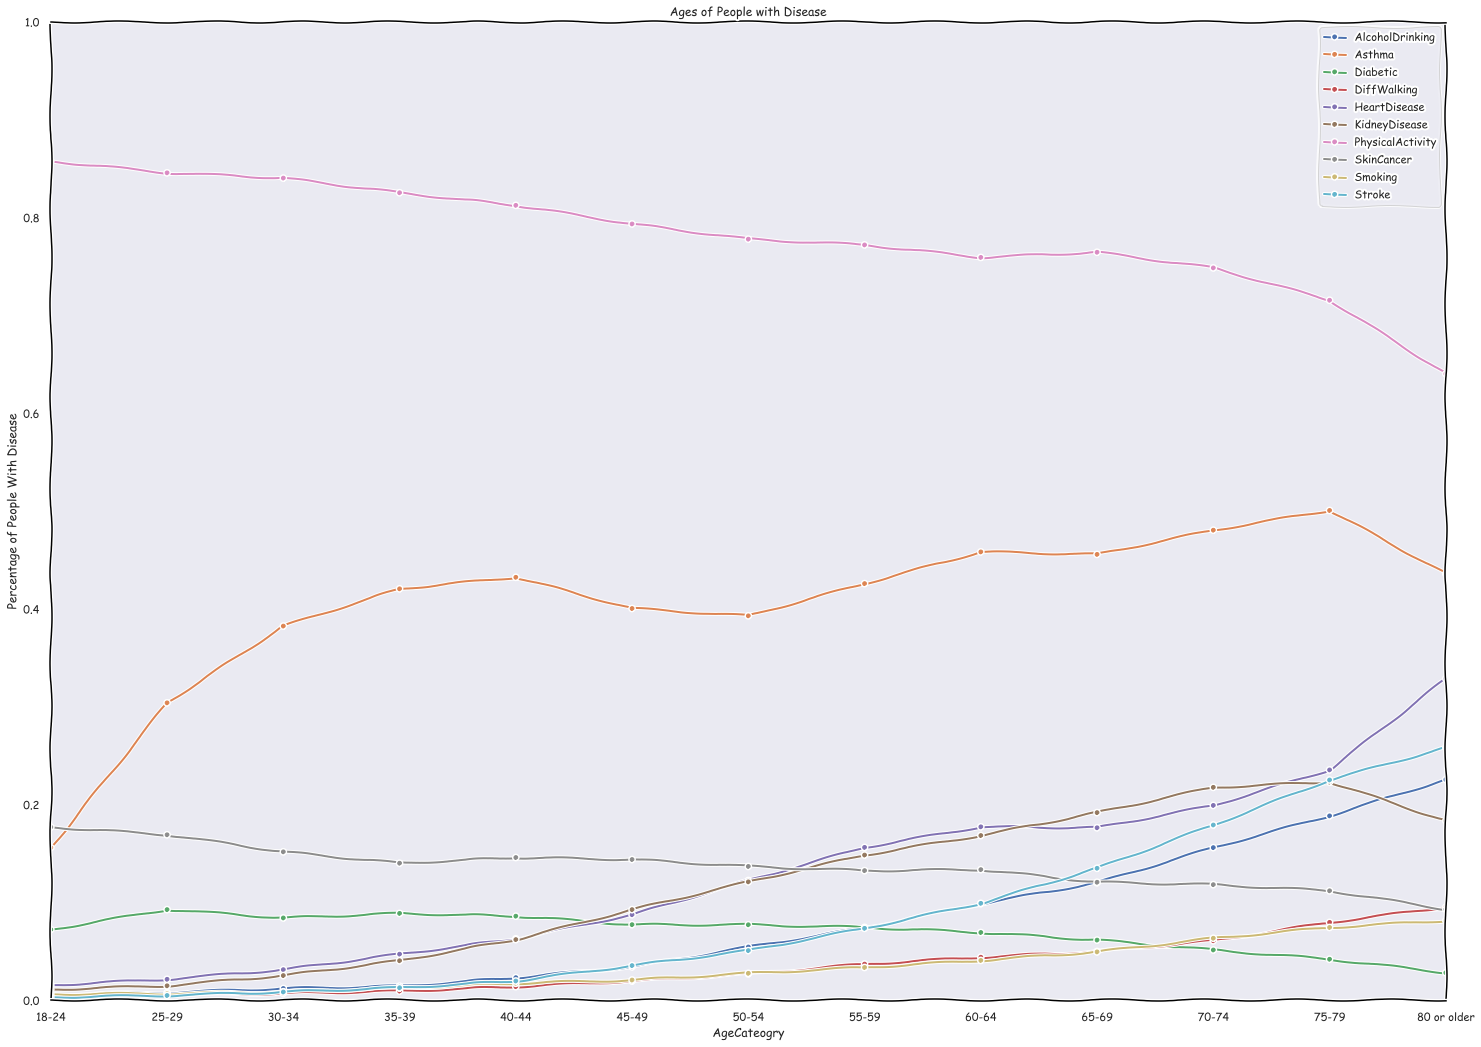

In [52]:
with plt.xkcd():
    plt.figure(figsize=(25,18))
    plt.axis([0, 12, 0, 1])
    plt.xlabel('AgeCateogry')
    plt.ylabel('Percentage of People With Disease') 
    plt.title('Ages of People with Disease')
    for col in AgeDiseasespercent[["HeartDisease", "Smoking","AlcoholDrinking","Stroke","DiffWalking","Diabetic","PhysicalActivity","Asthma","KidneyDisease","SkinCancer"]]:

        plt.plot(AgeDiseasespercent.index, AgeDiseasespercent[col], marker = ".")
        plt.legend(AgeDiseasespercent.columns.difference(['Answer']))

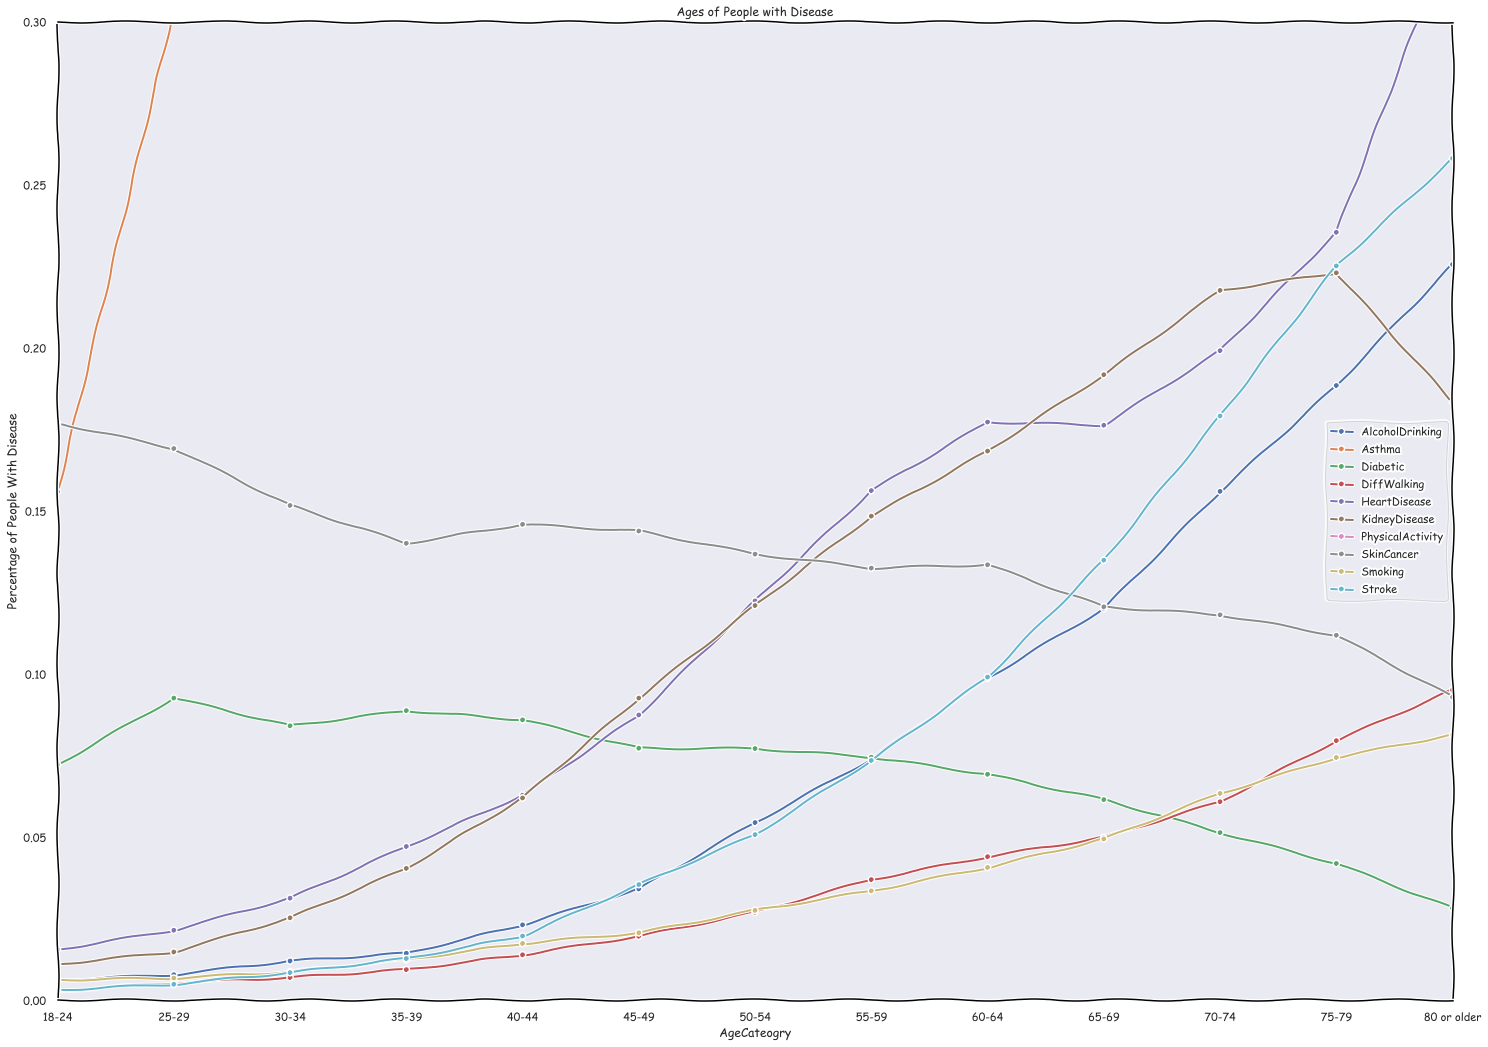

In [53]:
with plt.xkcd():
    plt.figure(figsize=(25,18))
    plt.axis([0, 12, 0, .3])
    plt.xlabel('AgeCateogry')
    plt.ylabel('Percentage of People With Disease') 
    plt.title('Ages of People with Disease')
    for col in AgeDiseasespercent[["HeartDisease", "Smoking","AlcoholDrinking","Stroke","DiffWalking","Diabetic","PhysicalActivity","Asthma","KidneyDisease","SkinCancer"]]:

        plt.plot(AgeDiseasespercent.index, AgeDiseasespercent[col], marker = ".")
        plt.legend(AgeDiseasespercent.columns.difference(['Answer']))

In [54]:
grouped_multiple = df.groupby(['AgeCategory', 'Diabetic']).agg({'SleepTime': ['mean', 'min', 'max']})
grouped_multiple.columns = ['sleeptime_mean', 'sleeptime_min', 'sleeptime_max']
grouped_multiple = grouped_multiple.reset_index()
grouped_multiple

AgeCategory                 Diabetic  sleeptime_mean  sleeptime_min  \
0         18-24                       No        7.188716            1.0   
1         18-24  No, borderline diabetes        7.011561            2.0   
2         18-24                      Yes        7.270386            2.0   
3         18-24   Yes (during pregnancy)        6.816327            3.0   
4         25-29                       No        6.989747            1.0   
5         25-29  No, borderline diabetes        6.960000            2.0   
6         25-29                      Yes        6.852590            2.0   
7         25-29   Yes (during pregnancy)        6.875000            1.0   
8         30-34                       No        6.879172            1.0   
9         30-34  No, borderline diabetes        6.946602            2.0   
10        30-34                      Yes        6.689873            1.0   
11        30-34   Yes (during pregnancy)        6.726974            3.0   
12        35-39                       No        6.868291            1.0   
13        35-39  No, borderline diabetes        6.652015            2.0   
14        35-39                      Yes        6.737665            1.0   
15        35-39   Yes (during pregnancy)        6.576503            1.0   
16        40-44                       No        6.893455            1.0   
17        40-44  No, borderline diabetes        6.700000            2.0   
18        40-44                      Yes        6.676899            1.0   
19        40-44   Yes (during pregnancy)        6.874286            3.0   
20        45-49                       No        6.924956            1.0   
21        45-49  No, borderline diabetes        6.728643            1.0   
22        45-49                      Yes        6.739475            1.0   
23        45-49   Yes (during pregnancy)        6.912698            3.0   
24        50-54                       No        6.948357            1.0   
25        50-54  No, borderline diabetes        6.792776            3.0   
26        50-54                      Yes        6.771484            1.0   
27        50-54   Yes (during pregnancy)        6.995690            1.0   
28        55-59                       No        6.977965            1.0   
29        55-59  No, borderline diabetes        6.903005            1.0   
30        55-59                      Yes        6.913969            1.0   
31        55-59   Yes (during pregnancy)        6.802083            2.0   
32        60-64                       No        7.079216            1.0   
33        60-64  No, borderline diabetes        7.002265            1.0   
34        60-64                      Yes        6.972849            1.0   
35        60-64   Yes (during pregnancy)        7.046875            2.0   
36        65-69                       No        7.217917            1.0   
37        65-69  No, borderline diabetes        7.135255            1.0   
38        65-69                      Yes        7.150382            1.0   
39        65-69   Yes (during pregnancy)        7.083916            2.0   
40        70-74                       No        7.314367            1.0   
41        70-74  No, borderline diabetes        7.176216            1.0   
42        70-74                      Yes        7.297885            1.0   
43        70-74   Yes (during pregnancy)        7.336364            3.0   
44        75-79                       No        7.414066            1.0   
45        75-79  No, borderline diabetes        7.244556            1.0   
46        75-79                      Yes        7.424755            1.0   
47        75-79   Yes (during pregnancy)        7.571429            5.0   
48  80 or older                       No        7.543481            1.0   
49  80 or older  No, borderline diabetes        7.367583            1.0   
50  80 or older                      Yes        7.557588            1.0   
51  80 or older   Yes (during pregnancy)        7.490566            2.0   

    sleeptime_max  
0       

Text(0.5, 1.0, 'age and average/Mean sleeptime')

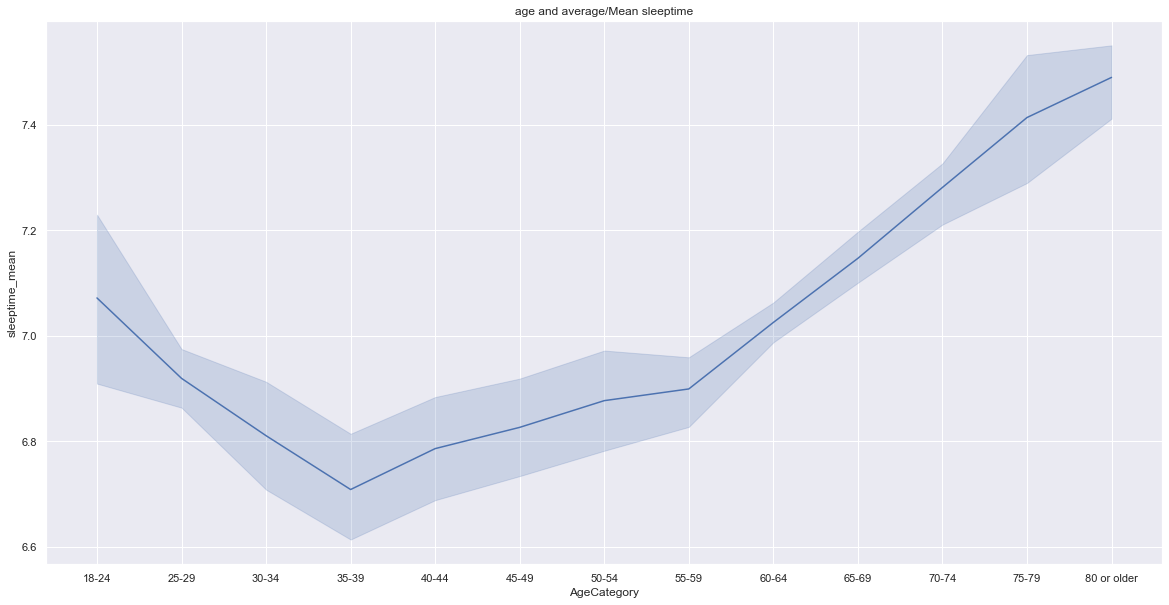

In [55]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=grouped_multiple, x="AgeCategory", y="sleeptime_mean")
plt.title('age and average/Mean sleeptime')

Text(0.5, 1.0, 'age and minimum sleeptime')

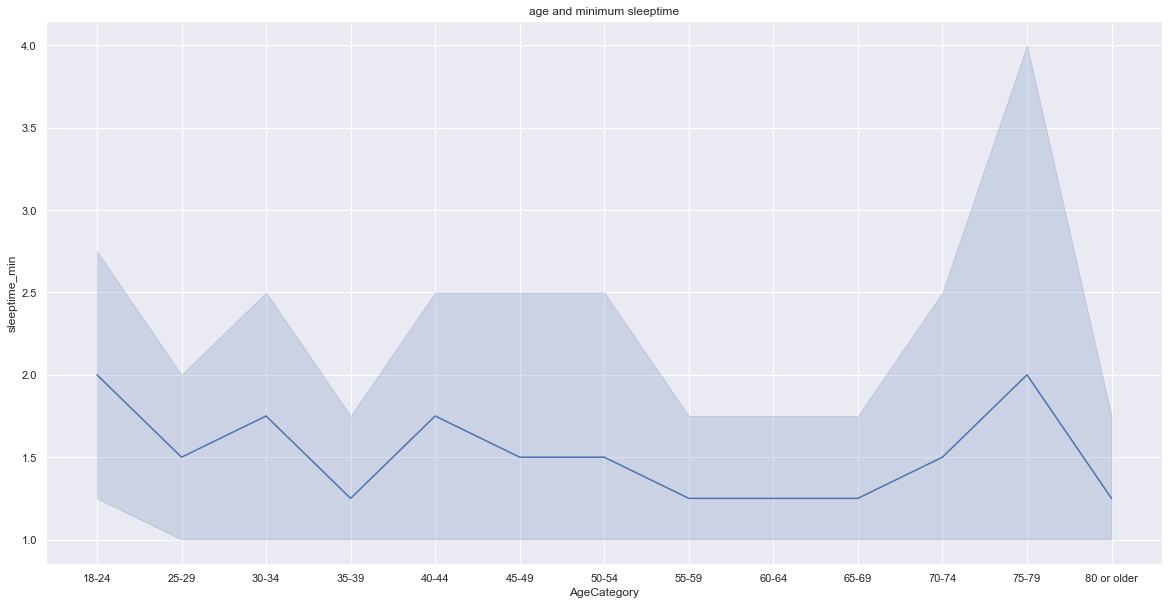

In [56]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=grouped_multiple, x="AgeCategory", y="sleeptime_min")
plt.title('age and minimum sleeptime')

Text(0.5, 1.0, 'age and maximum sleeptime')

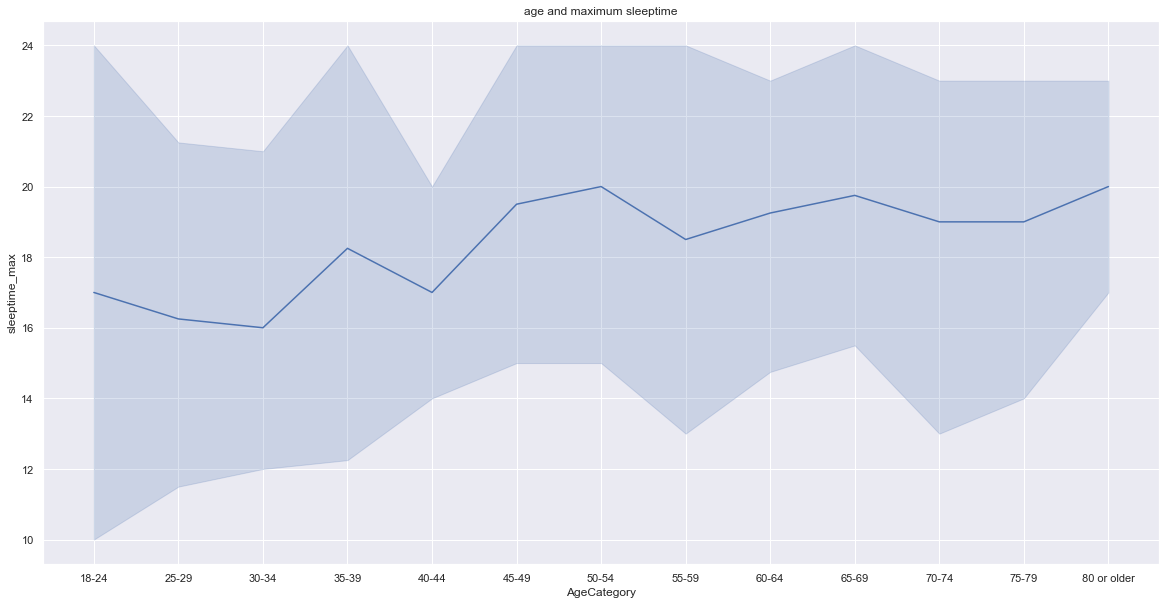

In [57]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=grouped_multiple, x="AgeCategory", y="sleeptime_max")
plt.title('age and maximum sleeptime')

Text(0.5, 1.0, 'Diabetes and maximum sleeptime')

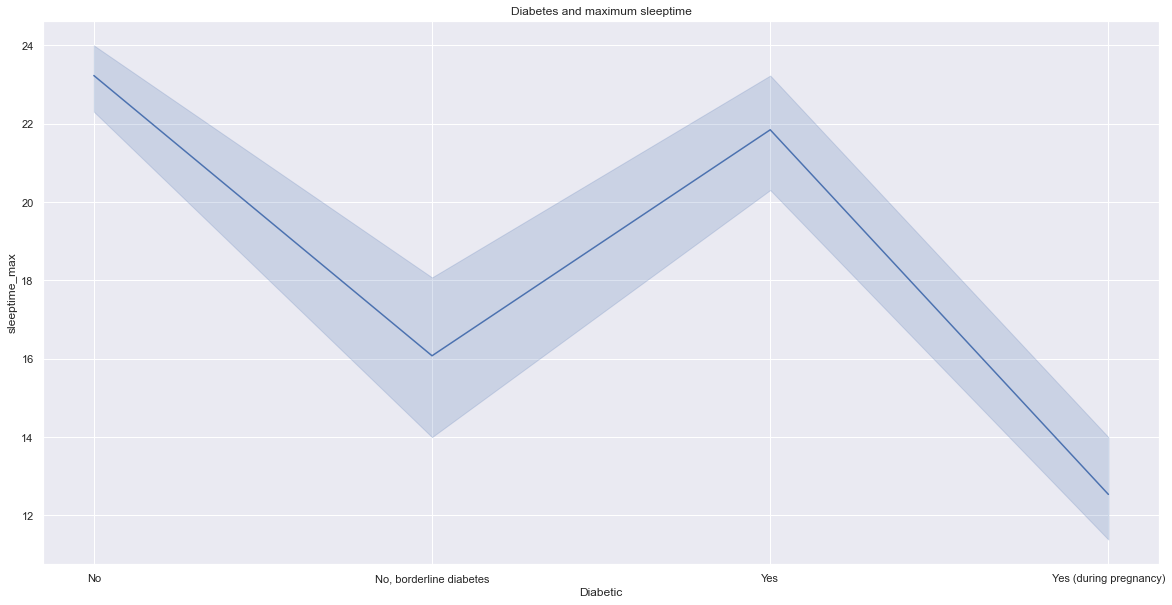

In [58]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=grouped_multiple, x="Diabetic", y="sleeptime_max")
plt.title('Diabetes and maximum sleeptime')

Text(0.5, 1.0, 'Diabetes and Minimum sleeptime')

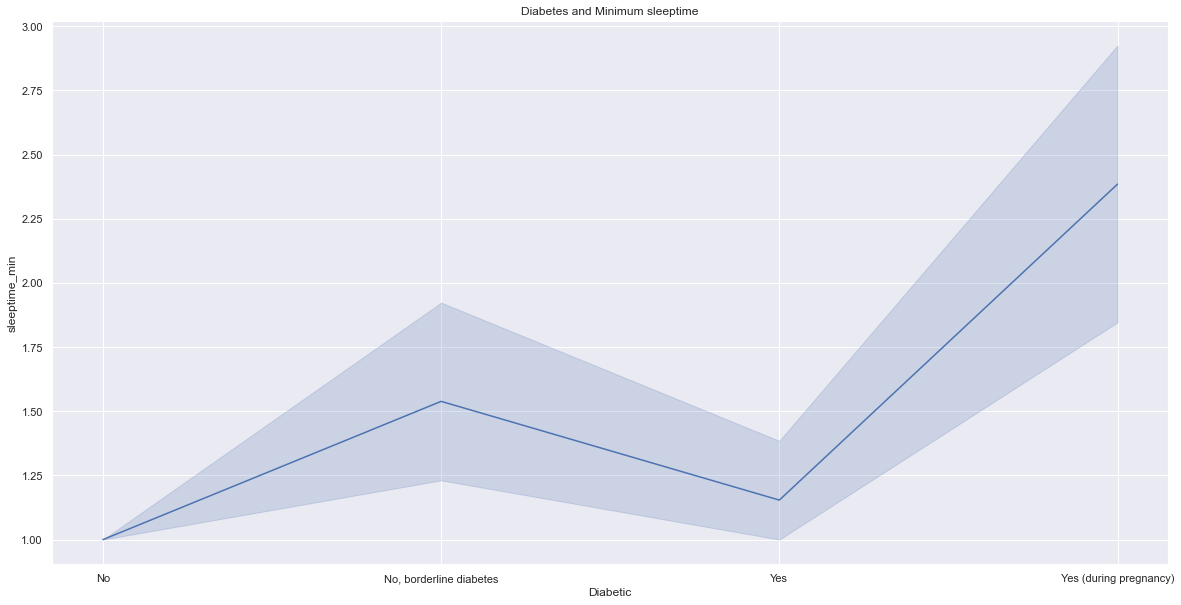

In [59]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=grouped_multiple, x="Diabetic", y="sleeptime_min")
plt.title('Diabetes and Minimum sleeptime')

Text(0.5, 1.0, 'Diabetes and mean/average sleeptime')

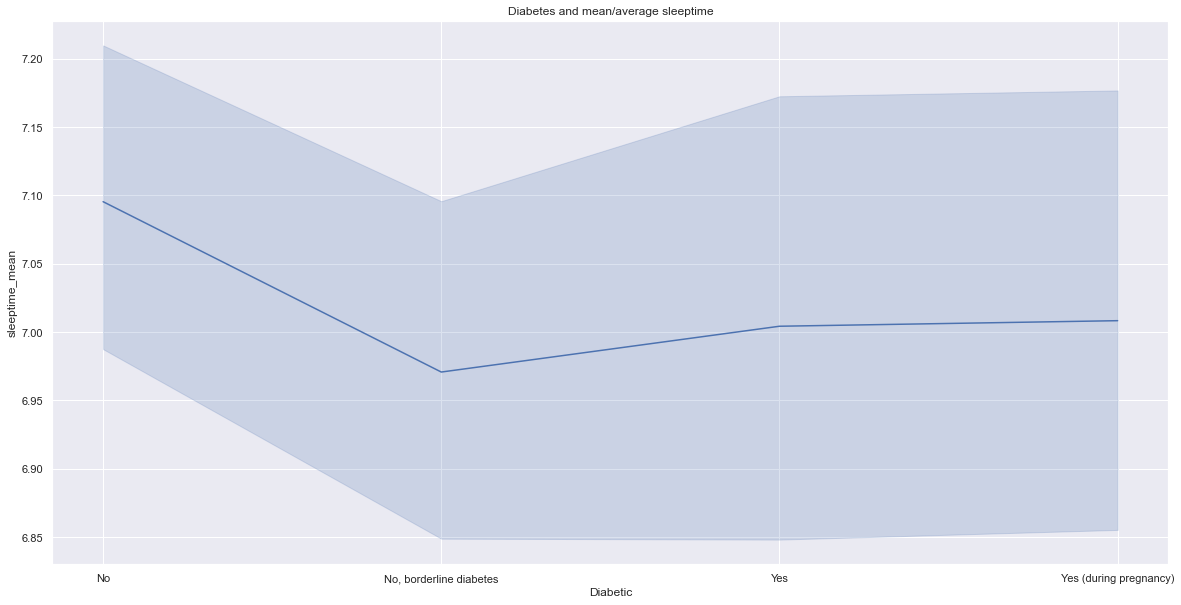

In [60]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=grouped_multiple, x="Diabetic", y="sleeptime_mean")
plt.title('Diabetes and mean/average sleeptime')

In [61]:
grouped_genhealth = df.groupby(['GenHealth']).agg({'BMI': ['mean', 'min', 'max']})
grouped_genhealth.columns = ['bmi_mean', 'bmi_min', 'bmi_max']
grouped_genhealth = grouped_genhealth.reset_index()
grouped_genhealth

GenHealth   bmi_mean  bmi_min  bmi_max
0  Excellent  26.099836    12.13    94.85
1       Fair  30.646690    12.48    88.60
2       Good  29.495961    12.02    85.17
3       Poor  30.402139    12.02    93.97
4  Very good  27.761608    12.16    94.66

Text(0.5, 1.0, 'General Health and mean/average Body Mass Index')

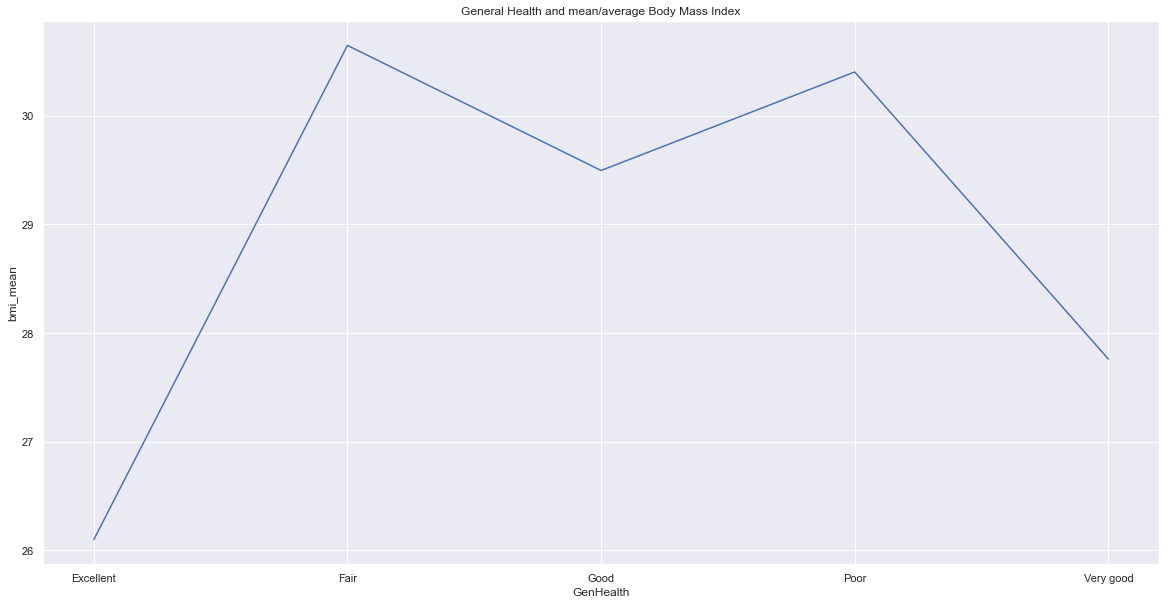

In [62]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=grouped_genhealth, x="GenHealth", y="bmi_mean")
plt.title('General Health and mean/average Body Mass Index')

Text(0.5, 1.0, 'General Health and maximum Body Mass Index')

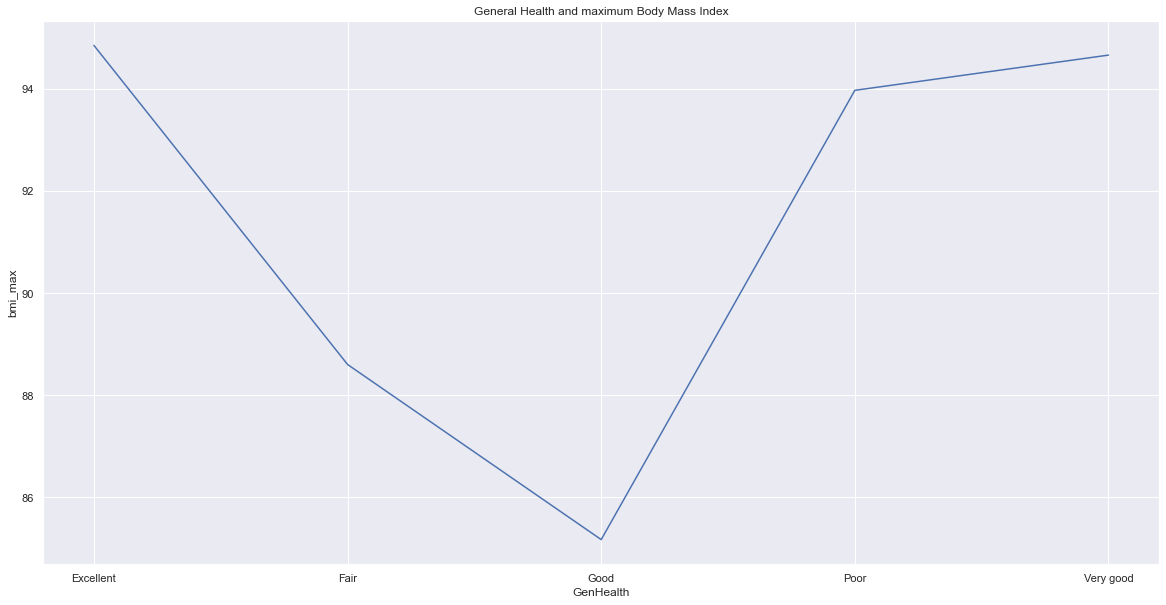

In [63]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=grouped_genhealth, x="GenHealth", y="bmi_max")
plt.title('General Health and maximum Body Mass Index')

Text(0.5, 1.0, 'General Health and minimum Body Mass Index')

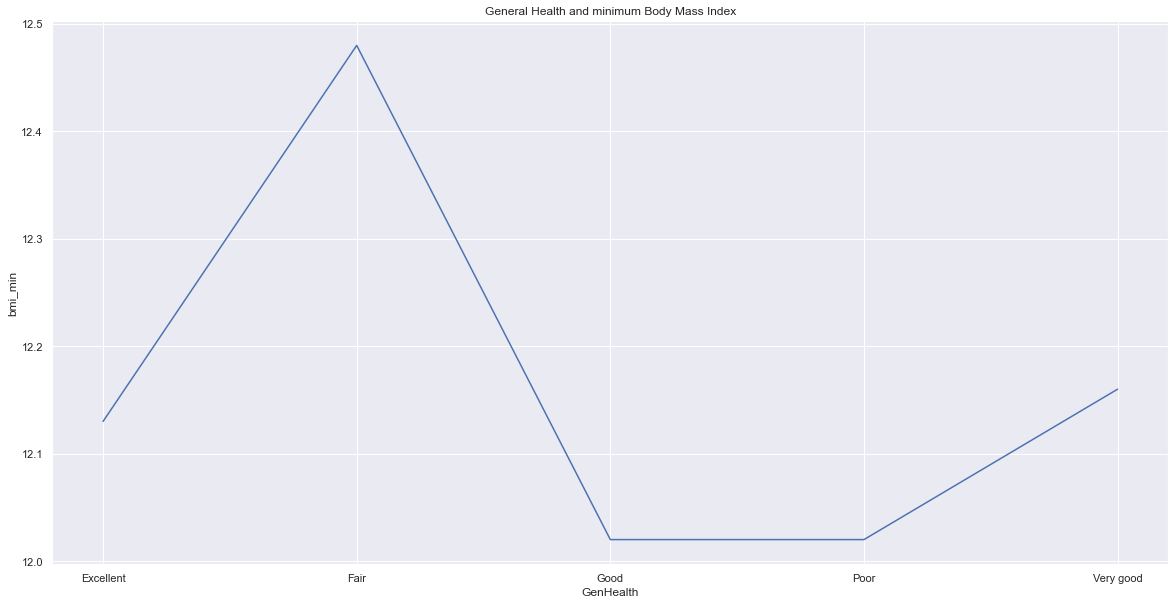

In [64]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=grouped_genhealth, x="GenHealth", y="bmi_min")
plt.title('General Health and minimum Body Mass Index')

In [65]:
grouped_age_bmi = df.groupby(['AgeCategory']).agg({'BMI': ['mean', 'min', 'max']})
grouped_age_bmi.columns = ['bmi_mean', 'bmi_min', 'bmi_max']
grouped_age_bmi = grouped_age_bmi.reset_index()
grouped_age_bmi

AgeCategory   bmi_mean  bmi_min  bmi_max
0         18-24  25.762770    12.02    83.33
1         25-29  27.688610    12.85    85.91
2         30-34  28.440007    12.08    87.05
3         35-39  28.838634    12.16    94.85
4         40-44  29.199764    12.40    91.55
5         45-49  29.487189    12.88    82.50
6         50-54  29.425097    12.26    94.66
7         55-59  29.098977    12.02    91.55
8         60-64  28.821778    12.13    84.44
9         65-69  28.674776    12.48    93.86
10        70-74  28.175795    12.40    79.10
11        75-79  27.597632    12.20    67.67
12  80 or older  26.217710    12.48    88.19

Text(0.5, 1.0, 'Age Category and Mean/Average Body Mass Index')

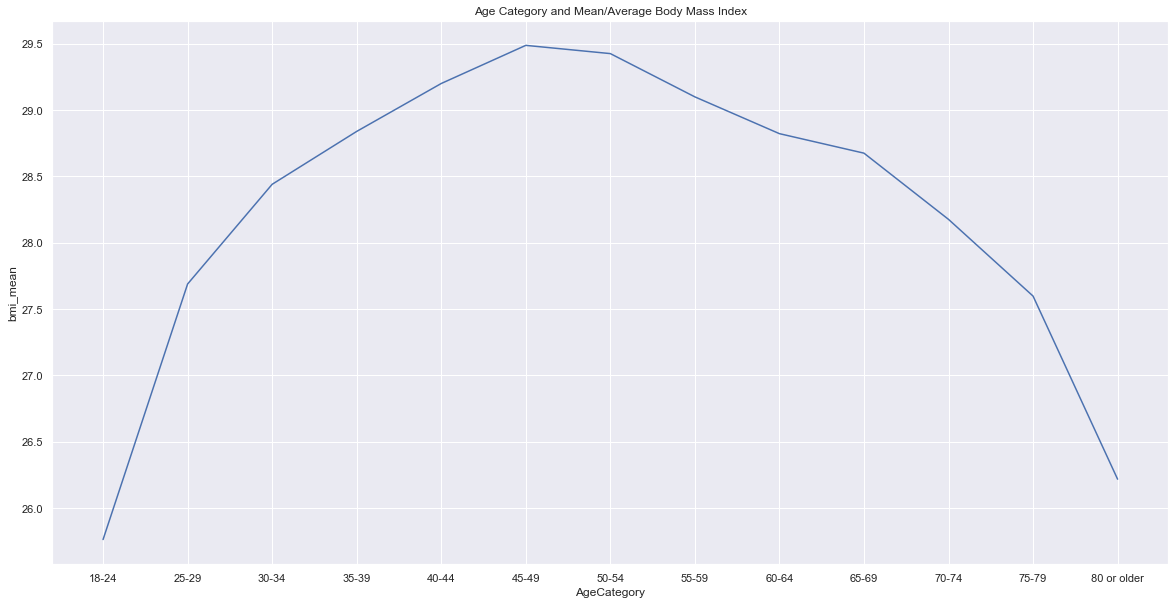

In [66]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=grouped_age_bmi, x="AgeCategory", y="bmi_mean")
plt.title('Age Category and Mean/Average Body Mass Index')

Text(0.5, 1.0, 'Age Category and Maximum Body Mass Index')

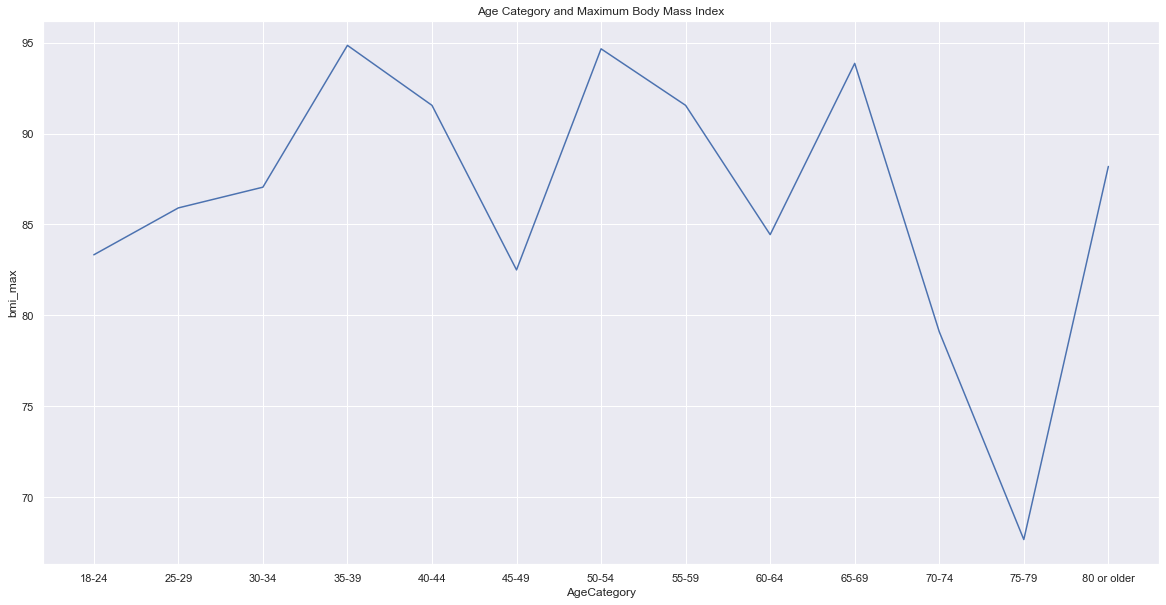

In [67]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=grouped_age_bmi, x="AgeCategory", y="bmi_max")
plt.title('Age Category and Maximum Body Mass Index')

Text(0.5, 1.0, 'Age Category and Minimum Body Mass Index')

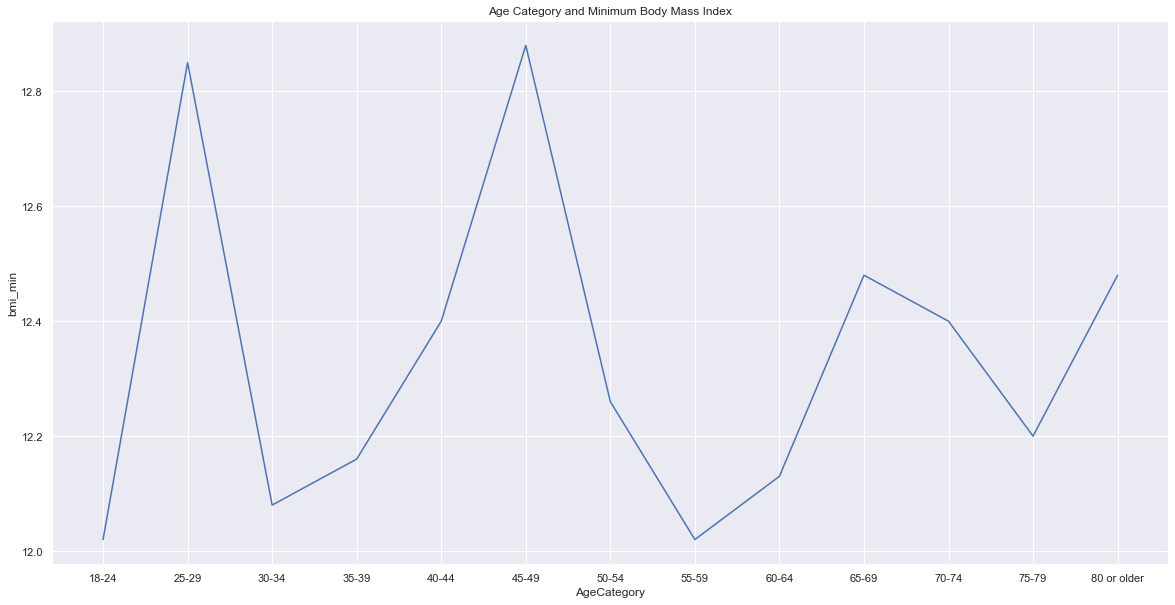

In [68]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=grouped_age_bmi, x="AgeCategory", y="bmi_min")
plt.title('Age Category and Minimum Body Mass Index')

In [69]:
grouped_race_bmi = df.groupby(['Race']).agg({'BMI': ['mean', 'min', 'max']})
grouped_race_bmi.columns = ['bmi_mean', 'bmi_min', 'bmi_max']
grouped_race_bmi = grouped_race_bmi.reset_index()
grouped_race_bmi

Race   bmi_mean  bmi_min  bmi_max
0  American Indian/Alaskan Native  29.627678    12.97    81.67
1                           Asian  25.218303    12.83    83.33
2                           Black  30.169993    12.02    92.53
3                        Hispanic  28.818086    12.50    86.80
4                           Other  28.748967    12.65    93.86
5                           White  28.153422    12.02    94.85

Text(0.5, 1.0, 'Race and Mean/Average Body Mass Index')

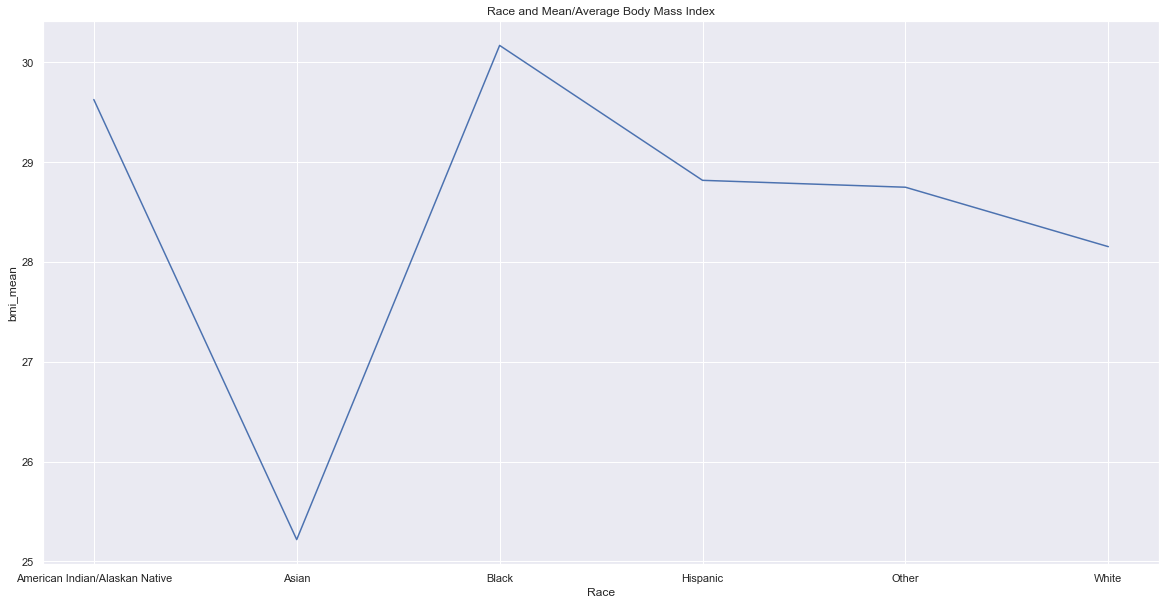

In [70]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=grouped_race_bmi, x="Race", y="bmi_mean")
plt.title('Race and Mean/Average Body Mass Index')

Text(0.5, 1.0, 'Race and Maximum Body Mass Index')

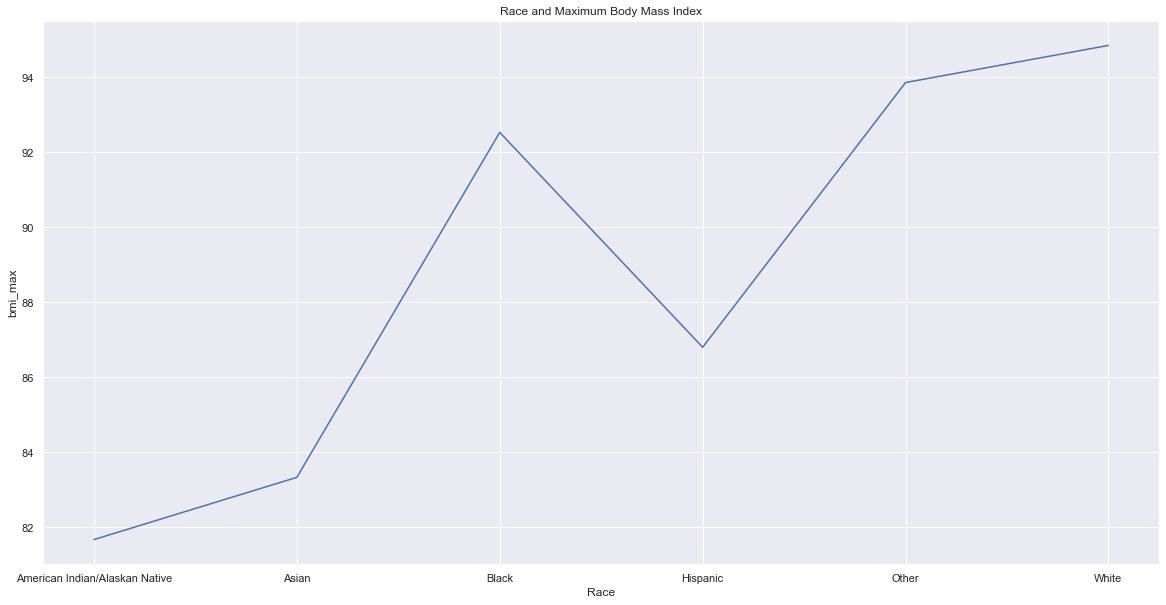

In [71]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=grouped_race_bmi, x="Race", y="bmi_max")
plt.title('Race and Maximum Body Mass Index')

Text(0.5, 1.0, 'Race and Minimum Body Mass Index')

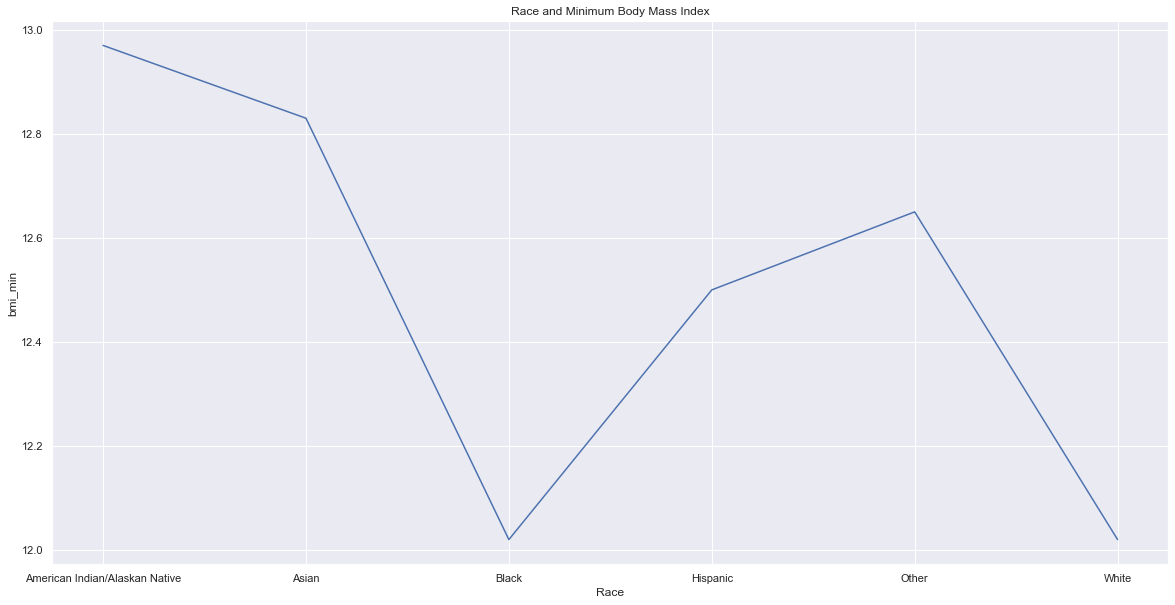

In [72]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=grouped_race_bmi, x="Race", y="bmi_min")
plt.title('Race and Minimum Body Mass Index')